<a href="https://colab.research.google.com/github/Anastas1aMakarova/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
!pip install fuzzy-c-means
from fcmeans import FCM
from sklearn.decomposition import PCA
%matplotlib inline

## Датасет № 1 - Кластеризация набора данных с известными метками классов (кластеров) объектов (http://archive.ics.uci.edu/dataset/27/credit+approval)

In [ ]:
df1 = pd.read_csv('crx.data', names = ['A1','A2','A3','A4','A5','A6','A7',
                                       'A8', 'A9','A10','A11','A12','A13',
                                       'A14','A15','A16'])
df1 = df1.loc[:, ['A2','A3','A8','A11','A14', 'A15']]
df1 = df1.replace('?',)
df1.head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1,00202,0
1,58.67,4.460,3.04,6,00043,560
2,24.50,0.500,1.50,0,00280,824
3,27.83,1.540,3.75,5,00100,3
4,20.17,5.625,1.71,0,00120,0


In [ ]:
df1_target = df1.loc[:,'A11']
np.unique(df1_target,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20, 23, 40, 67], dtype=int64),
 array([395,  71,  45,  28,  15,  18,  23,  16,  10,  10,   8,  19,   8,
          1,   8,   4,   3,   2,   1,   2,   1,   1,   1], dtype=int64))

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(df1.to_numpy())
scaled_data = scaler.transform(df1.to_numpy())
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.266663,0.169954,0.078014,0.035821,0.091896,0.010174
std,0.179141,0.177792,0.117422,0.072581,0.086784,0.052101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.132782,0.035714,0.005789,0.000000,0.036500,0.000000
50%,0.219925,0.098214,0.035088,0.000000,0.080000,0.000050
75%,0.360902,0.257411,0.092105,0.044776,0.140000,0.003955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pip install -U scikit-learn

### Иерархическая кластеризация с применением метода Уорда ('ward')

In [ ]:
from scipy.cluster.hierarchy import linkage
distance_matrix = linkage(scaled_data, method='ward', metric='euclidean')
distance_matrix

array([[2.90000000e+02, 3.15000000e+02, 0.00000000e+00, 2.00000000e+00],
       [9.60000000e+01, 6.04000000e+02, 6.62570373e-03, 2.00000000e+00],
       [5.60000000e+01, 3.89000000e+02, 7.14110089e-03, 2.00000000e+00],
       ...,
       [1.37200000e+03, 1.37400000e+03, 3.54068313e+00, 1.71000000e+02],
       [1.36700000e+03, 1.37500000e+03, 4.66330578e+00, 5.19000000e+02],
       [1.37600000e+03, 1.37700000e+03, 5.43918438e+00, 6.90000000e+02]])

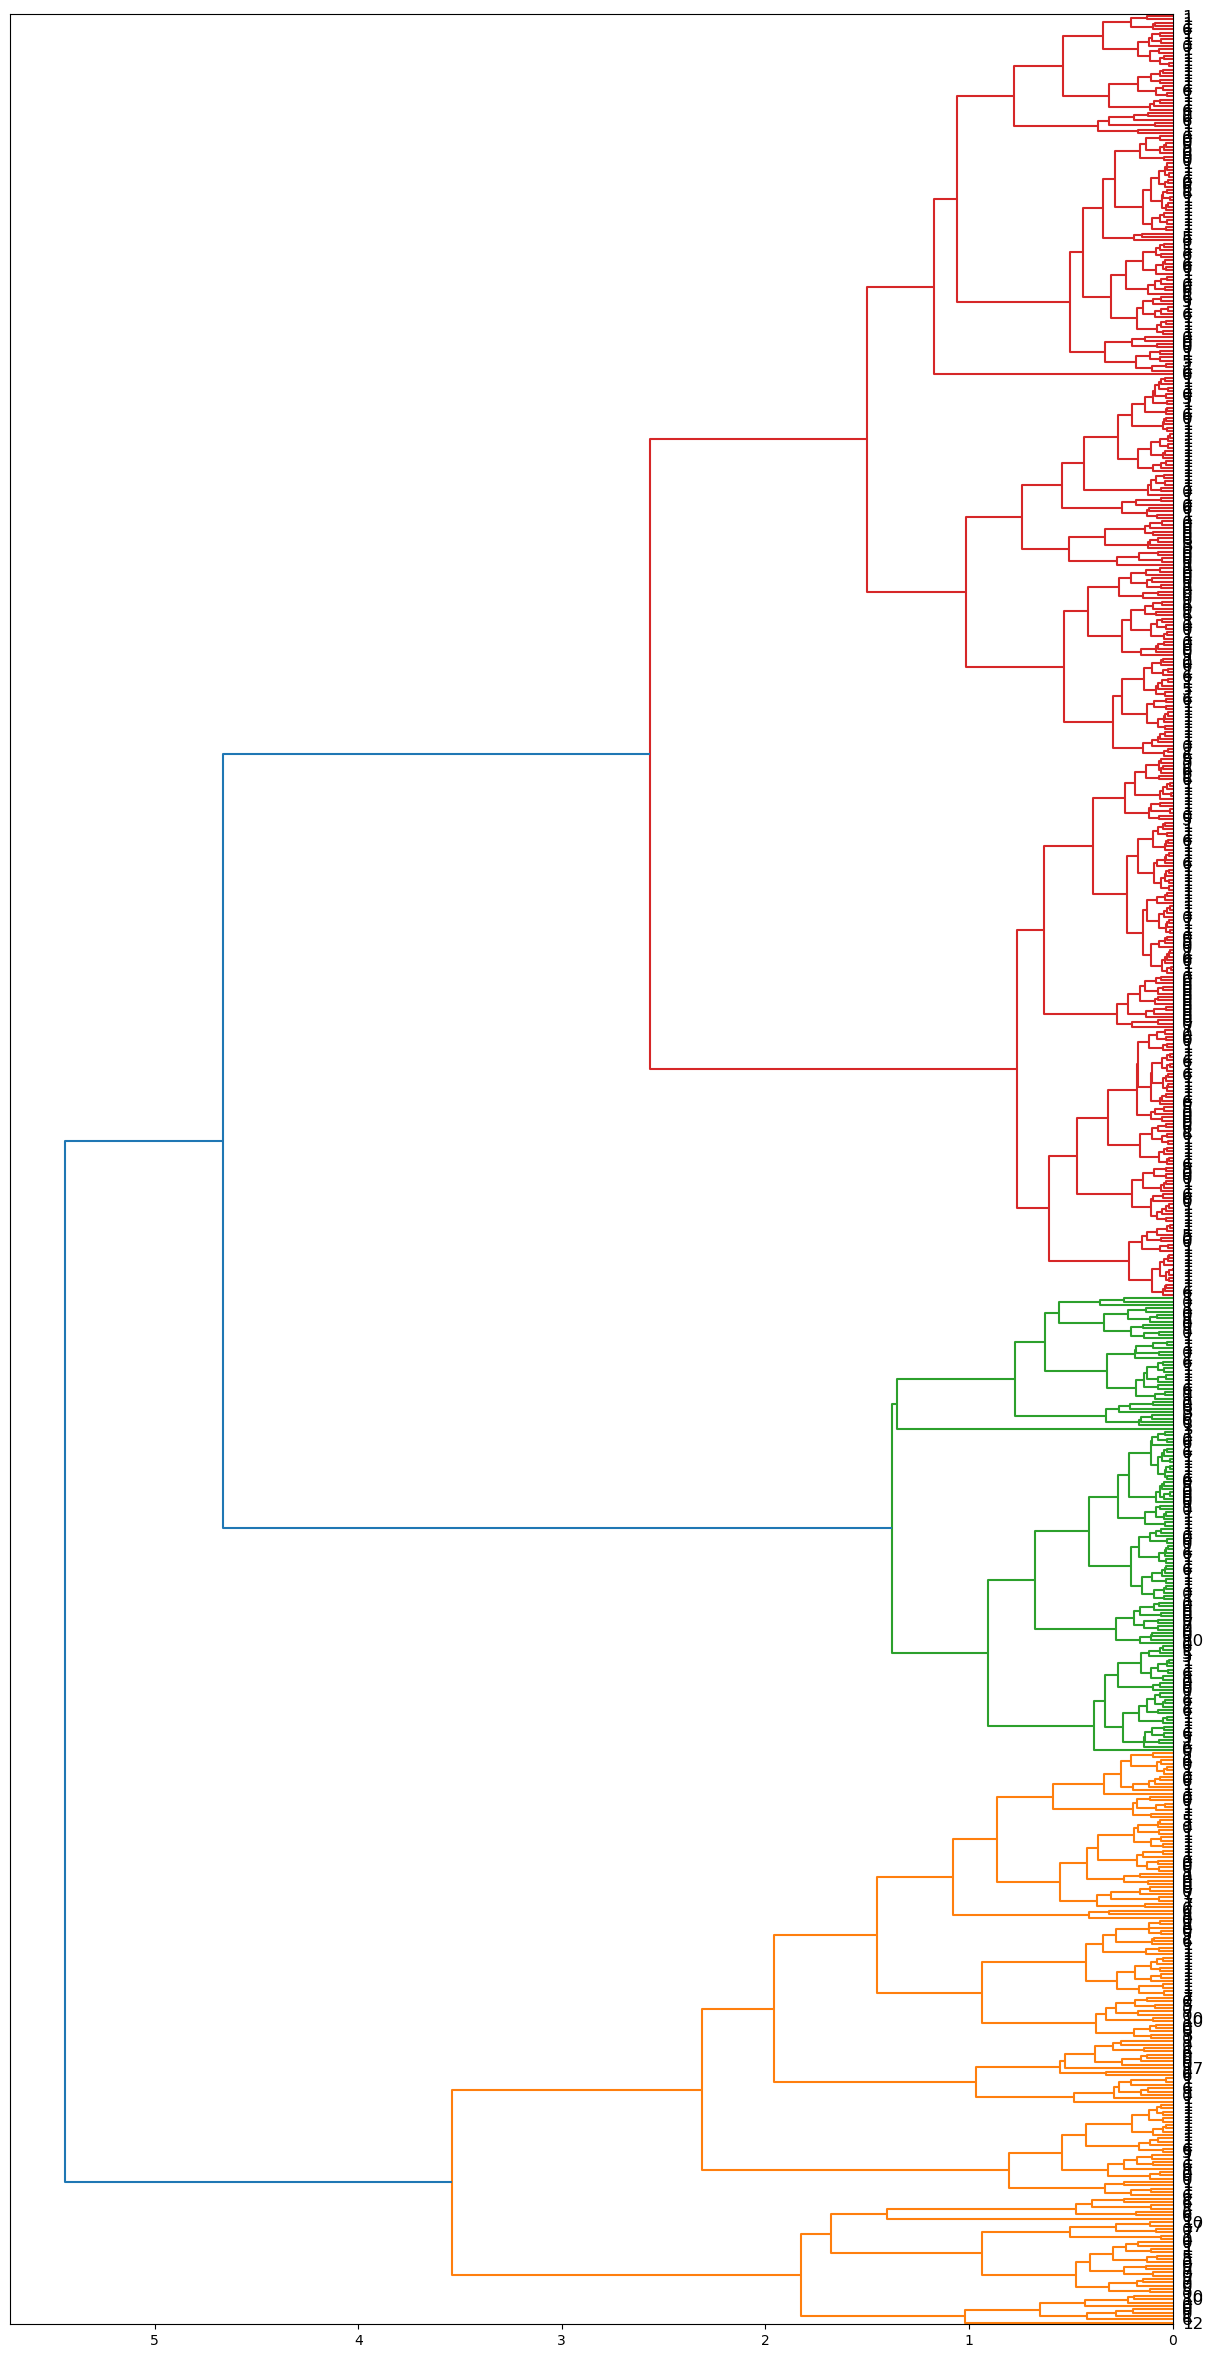

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

fig = plt.figure(figsize = (15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df1_target[i] for i in df1_target],
               orientation='left',
               leaf_font_size = 12)

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

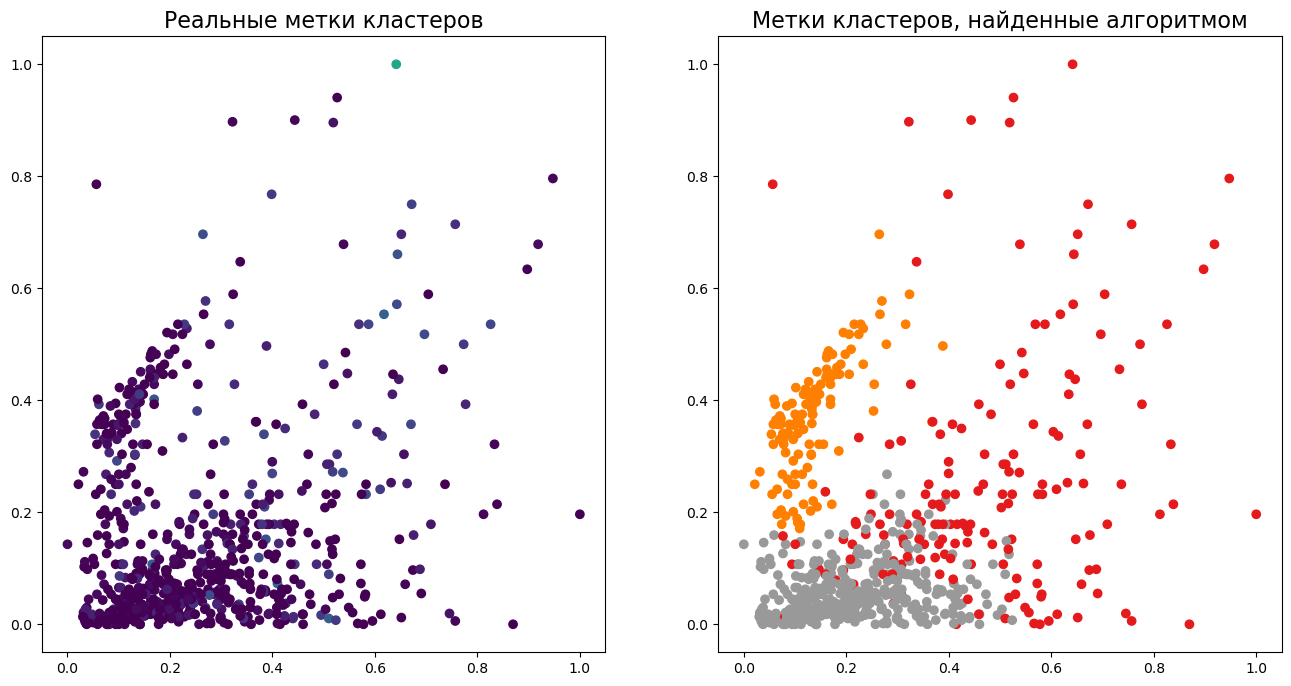

In [ ]:
df1['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df1['target'] = df1_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода одиночной связи ('single')

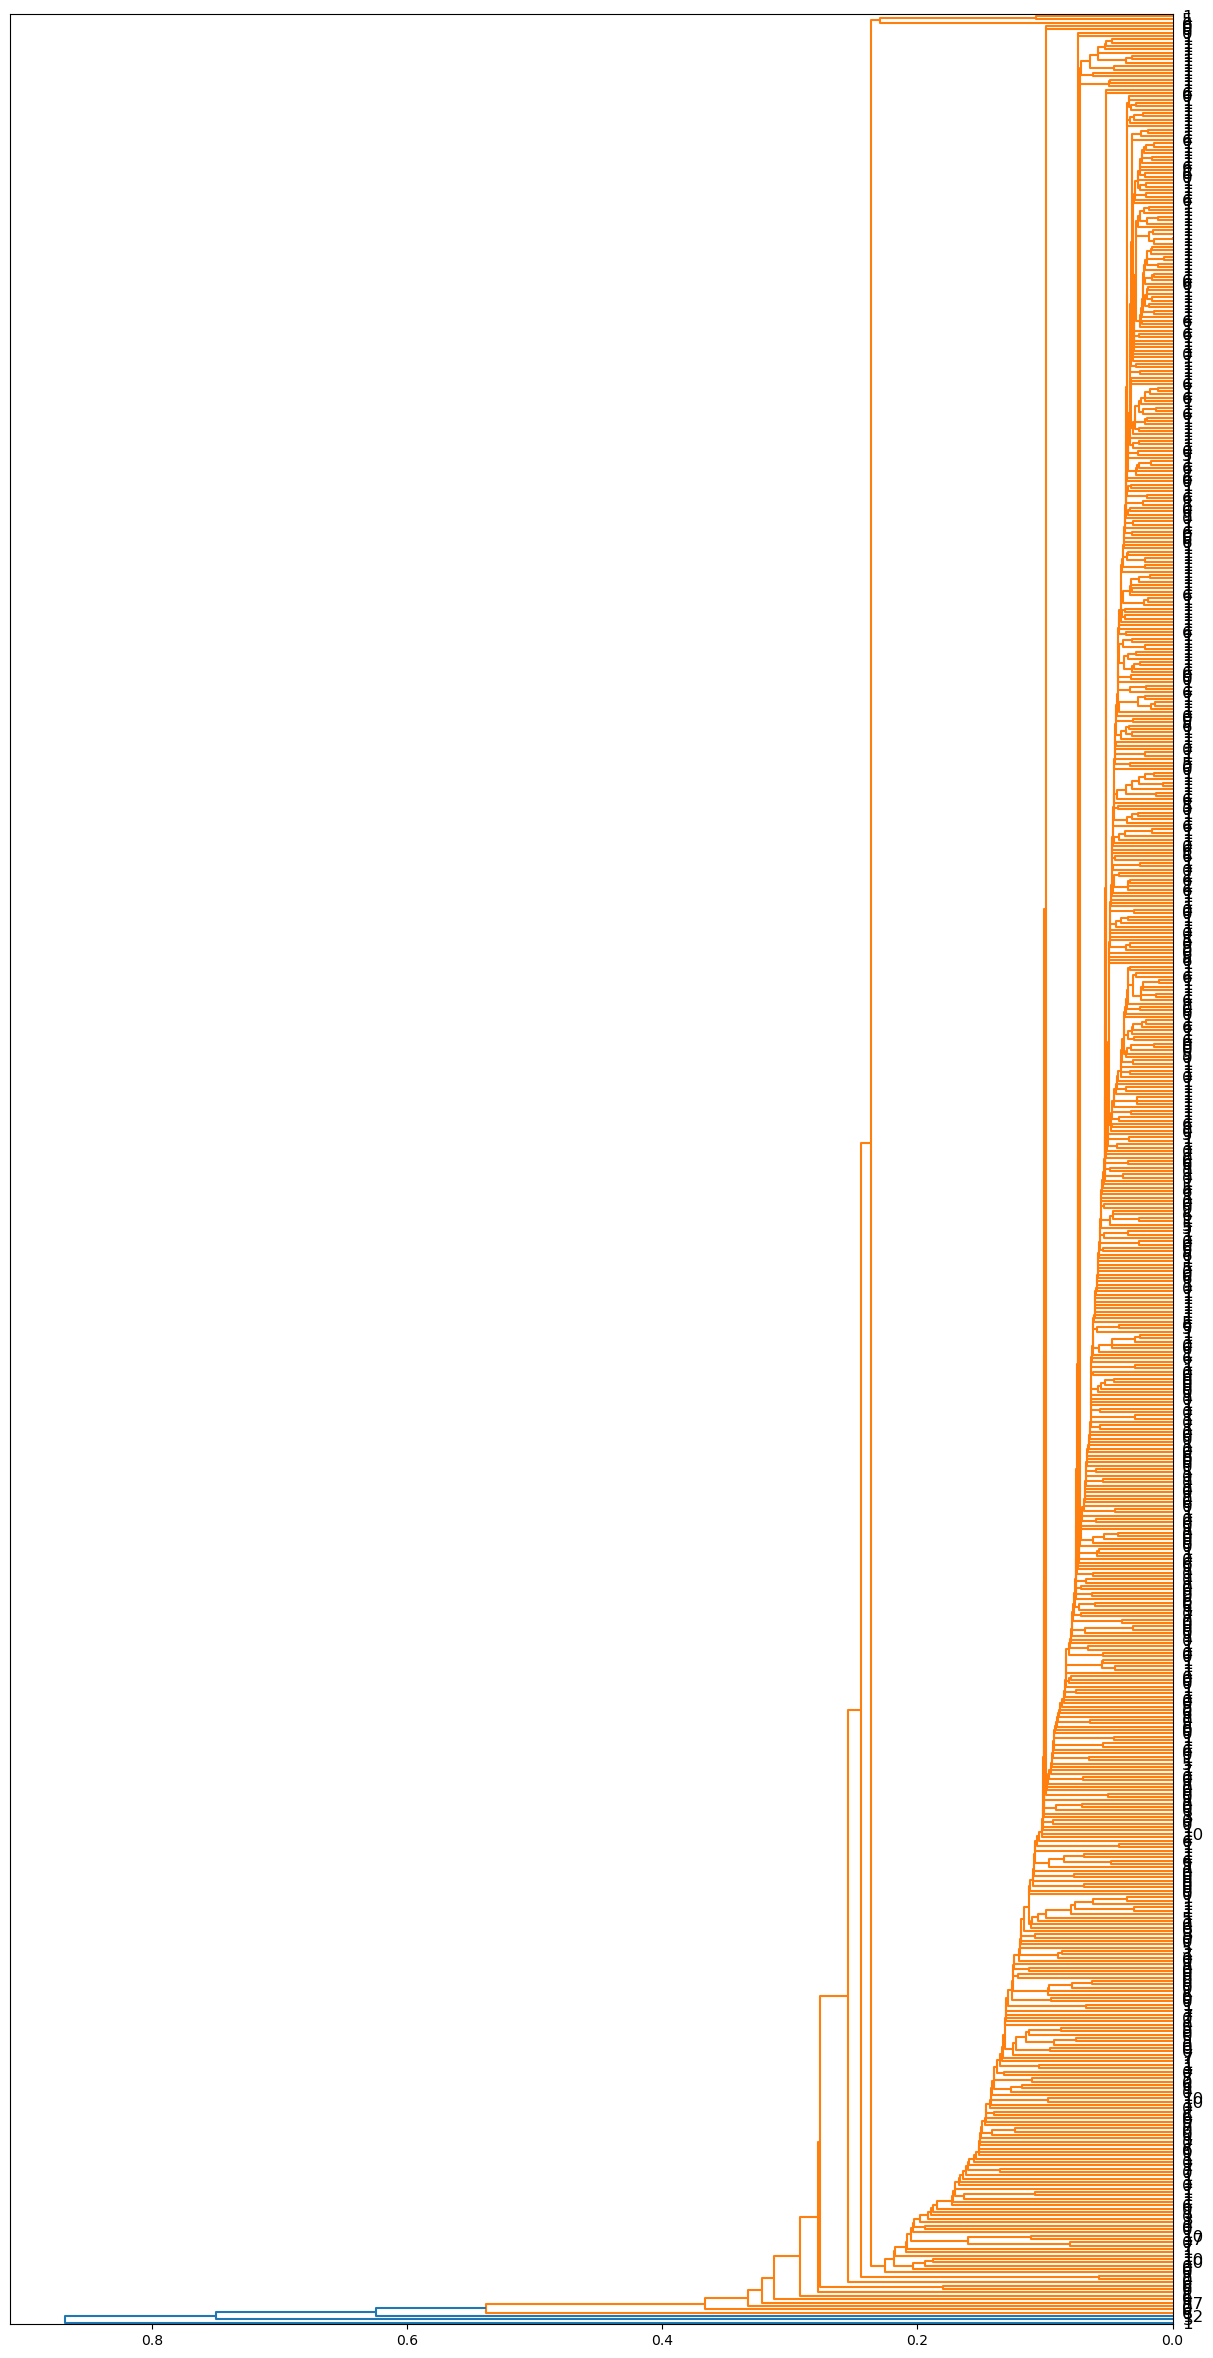

In [ ]:
df1 = df1.loc[:, df1.columns != 'target']
df1 = df1.loc[:, df1.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'single', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')

R = dendrogram(distance_matrix,
               labels=[df1_target[i] for i in df1_target],
               orientation='left',
               leaf_font_size = 12)
plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

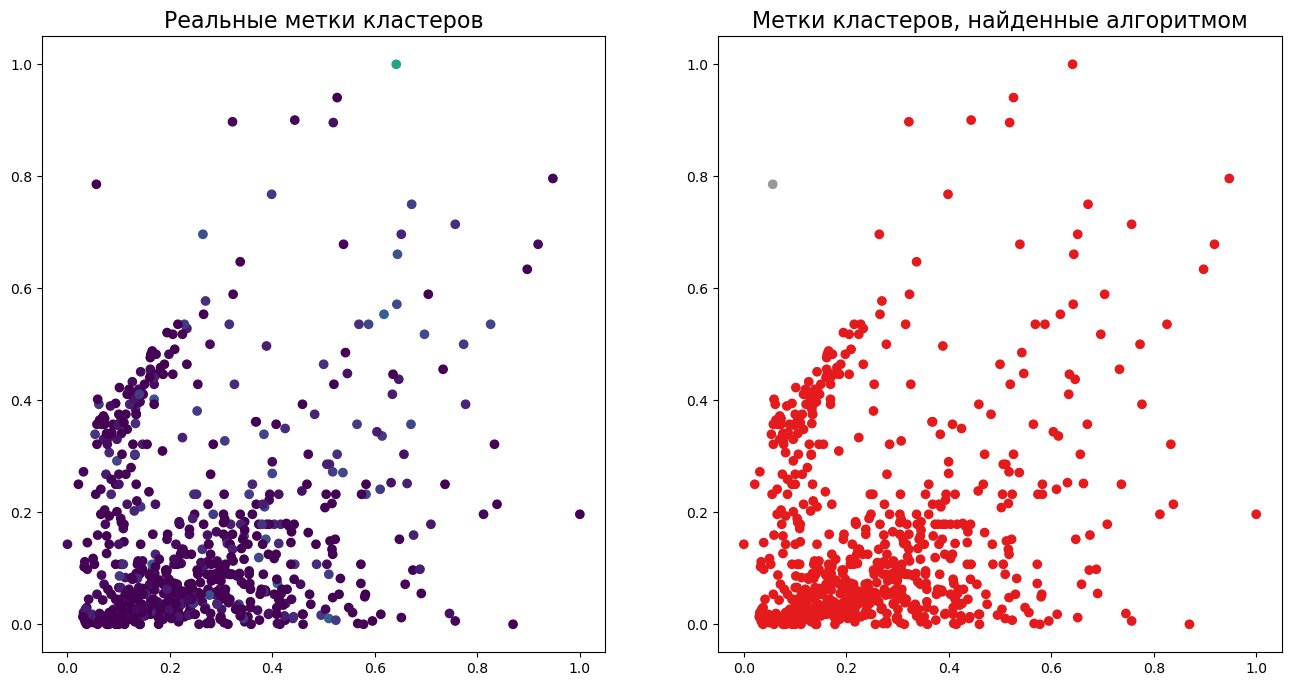

In [ ]:
df1['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df1['target'] = df1_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода полной связи ('complete')

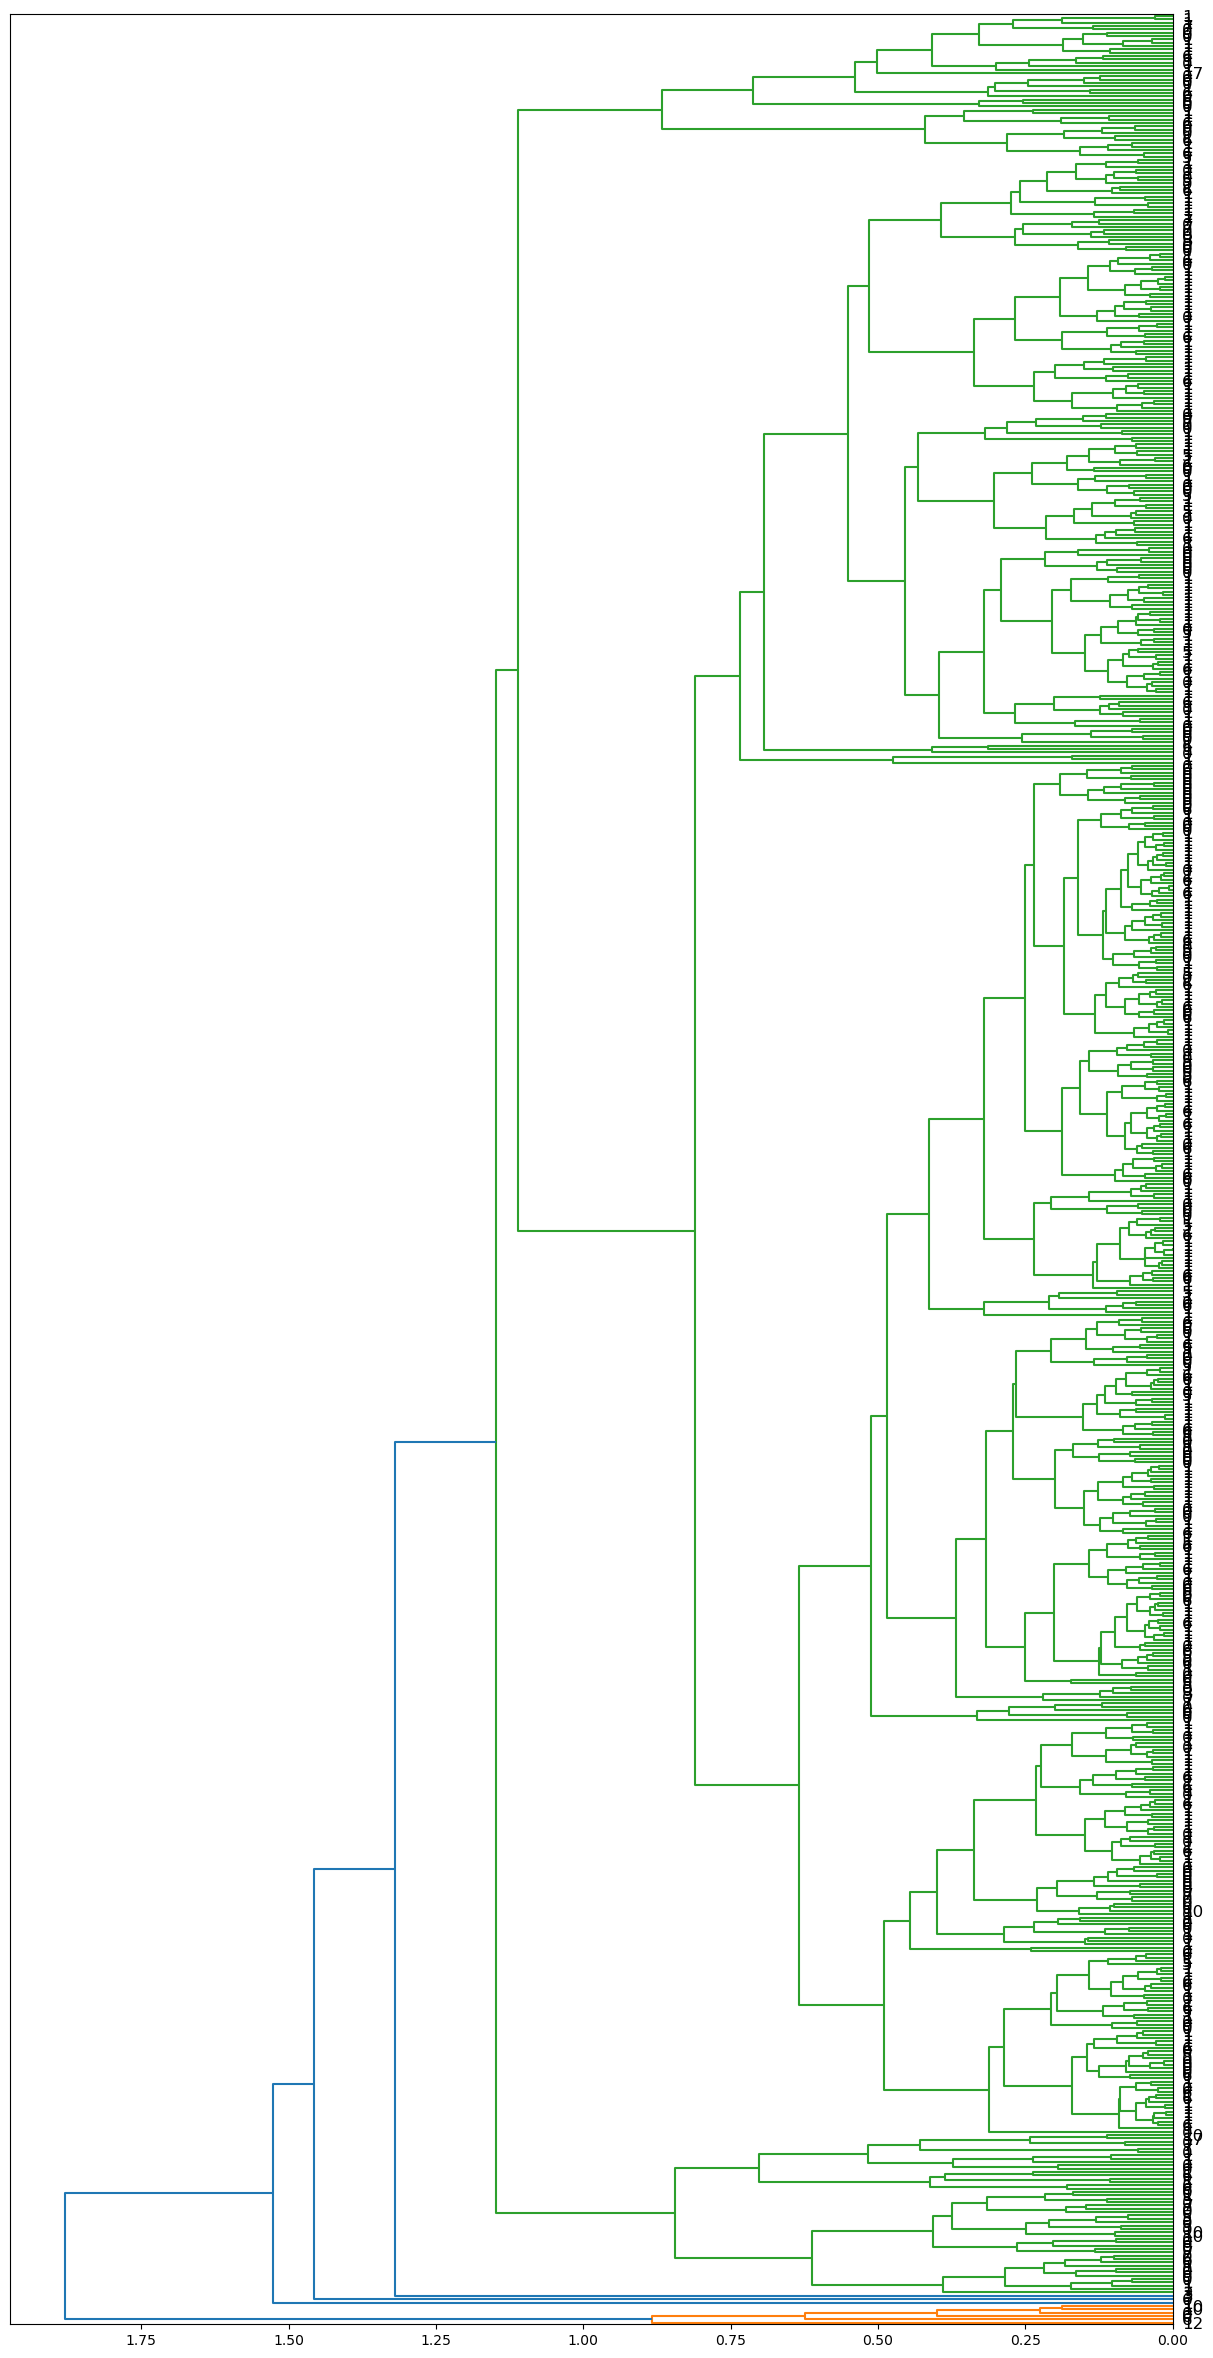

In [ ]:
df1 = df1.loc[:, df1.columns != 'target']
df1 = df1.loc[:, df1.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'complete', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')

R = dendrogram(distance_matrix,
               labels=[df1_target[i] for i in df1_target],
               orientation='left',
               leaf_font_size = 12)

plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

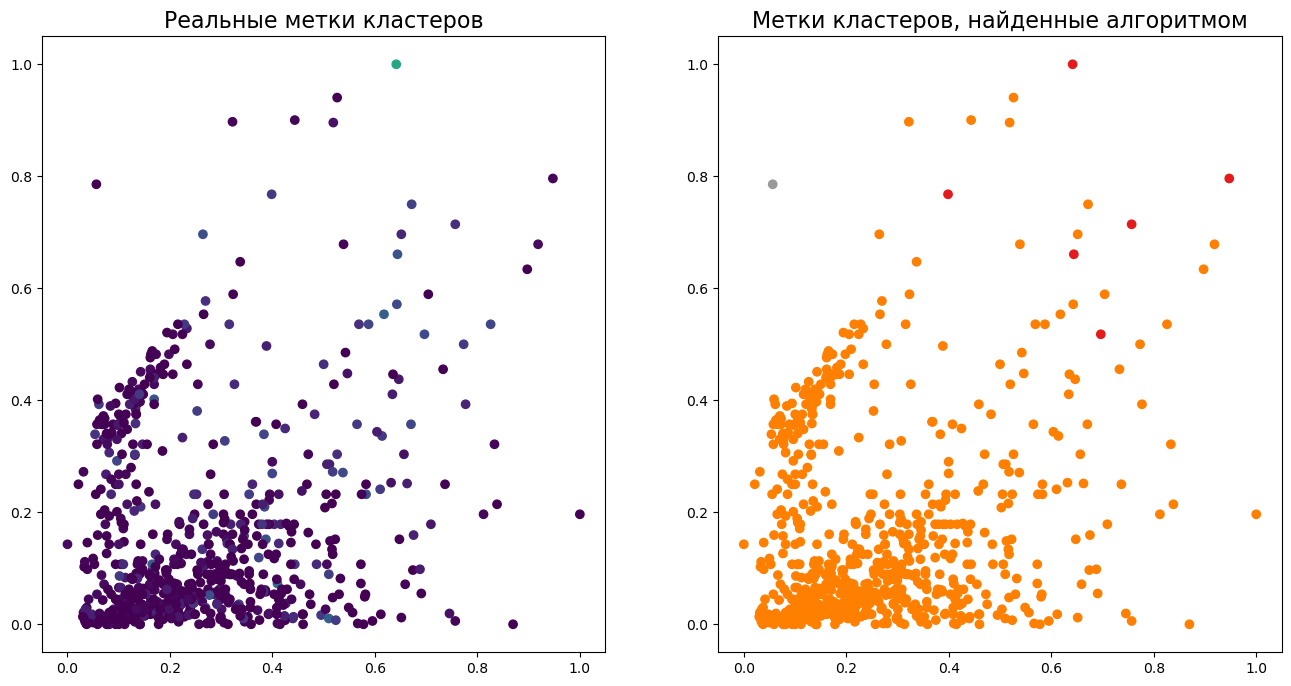

In [ ]:
df1['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df1['target'] = df1_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода средней связи ('average')

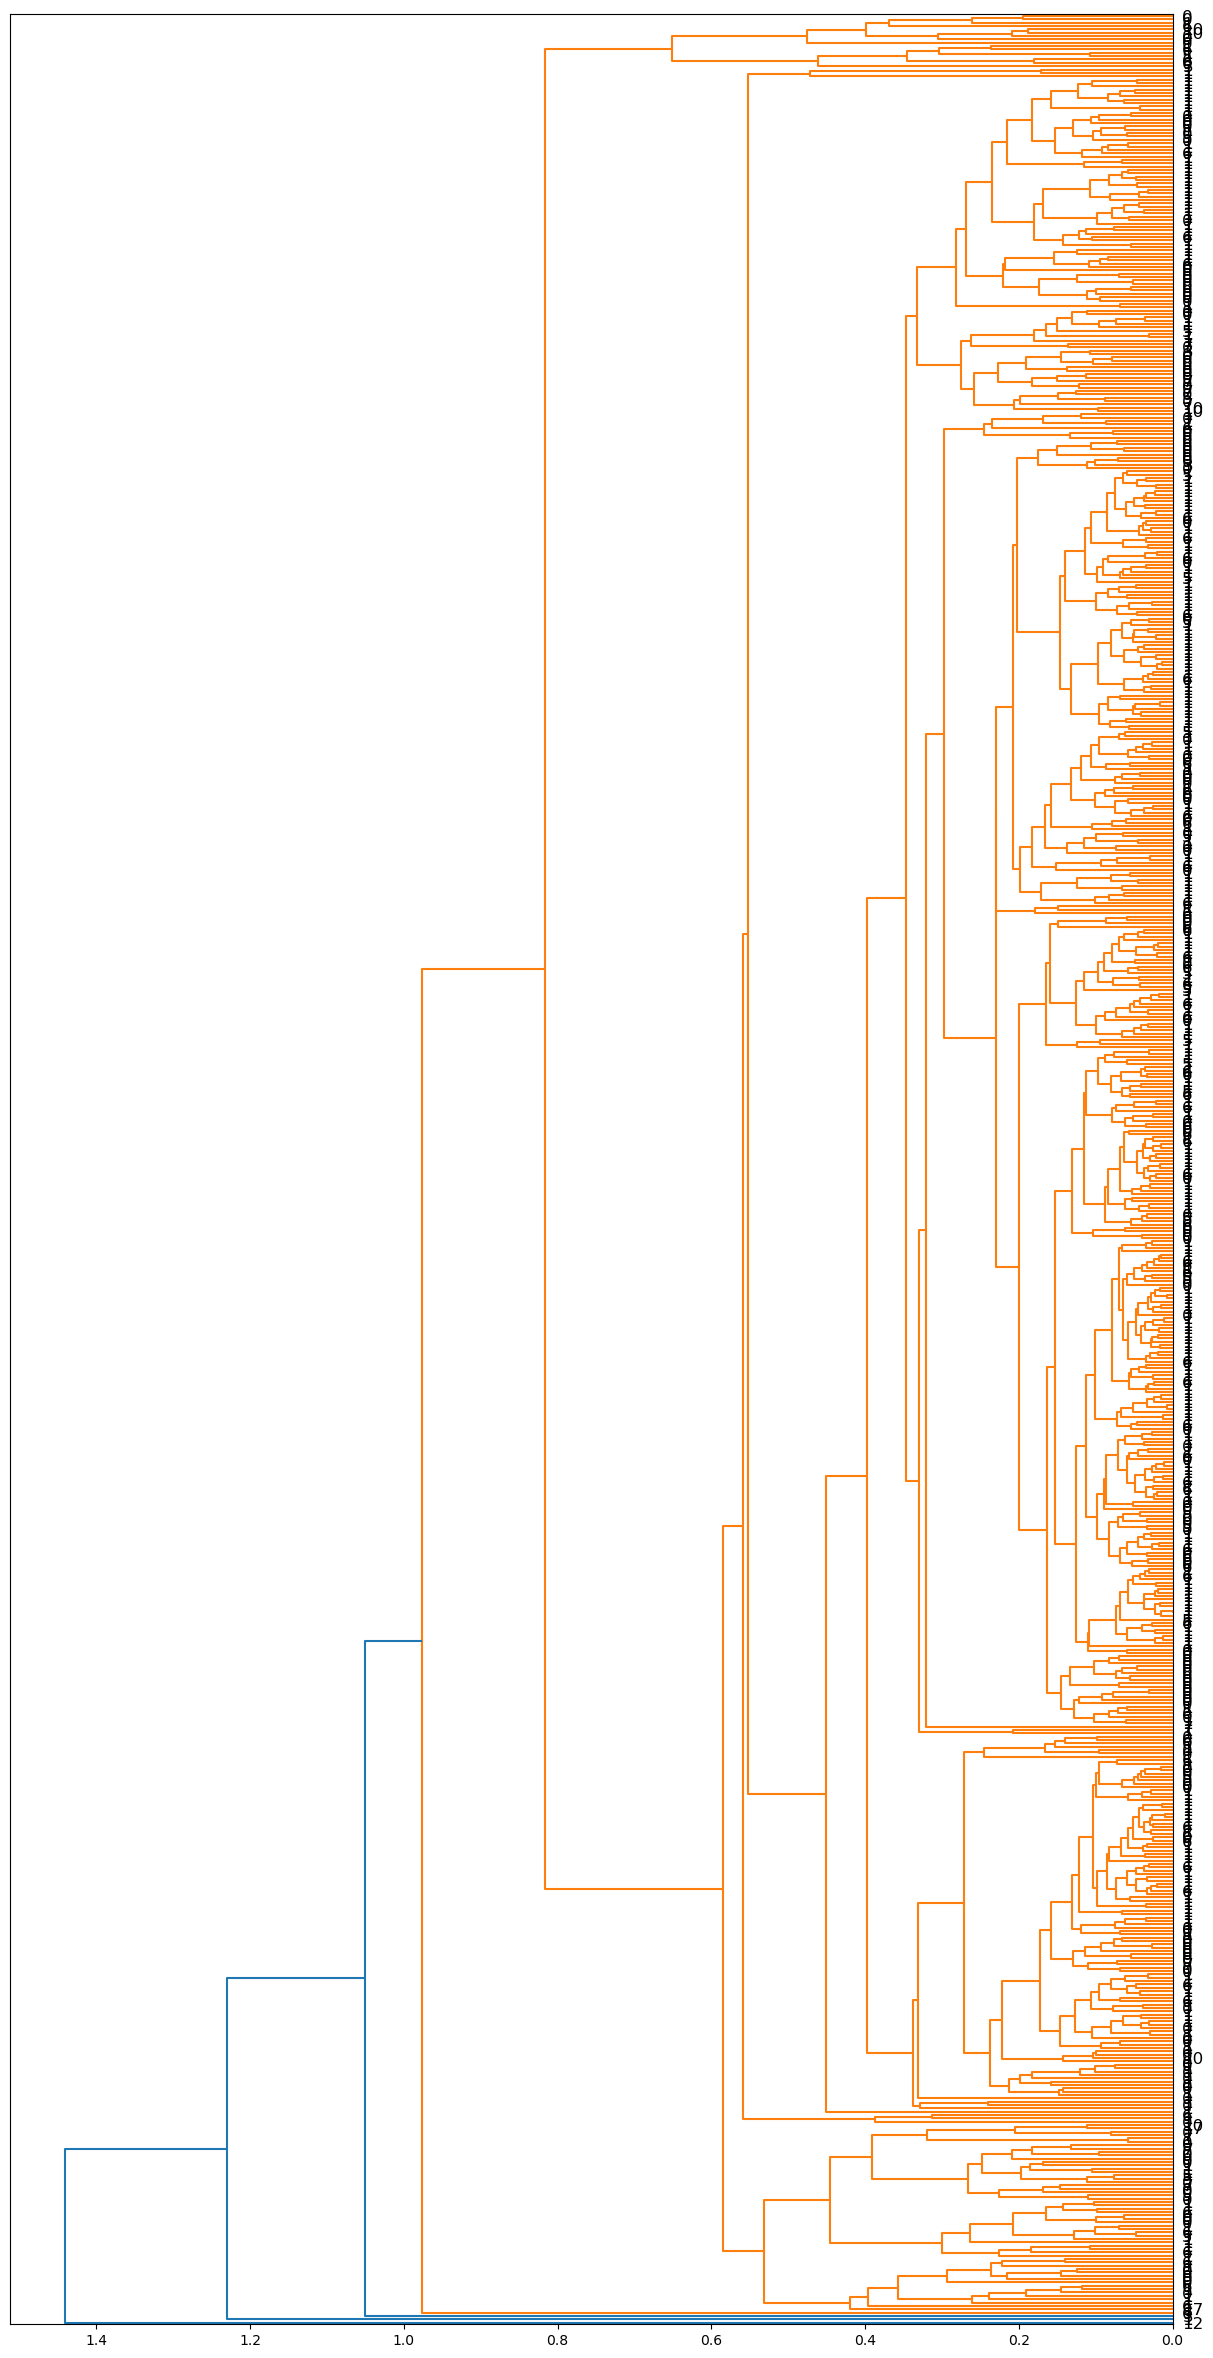

In [ ]:
df1 = df1.loc[:, df1.columns != 'target']
df1 = df1.loc[:, df1.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'average', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df1_target[i] for i in df1_target],
               orientation='left',
               leaf_font_size = 12)
plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

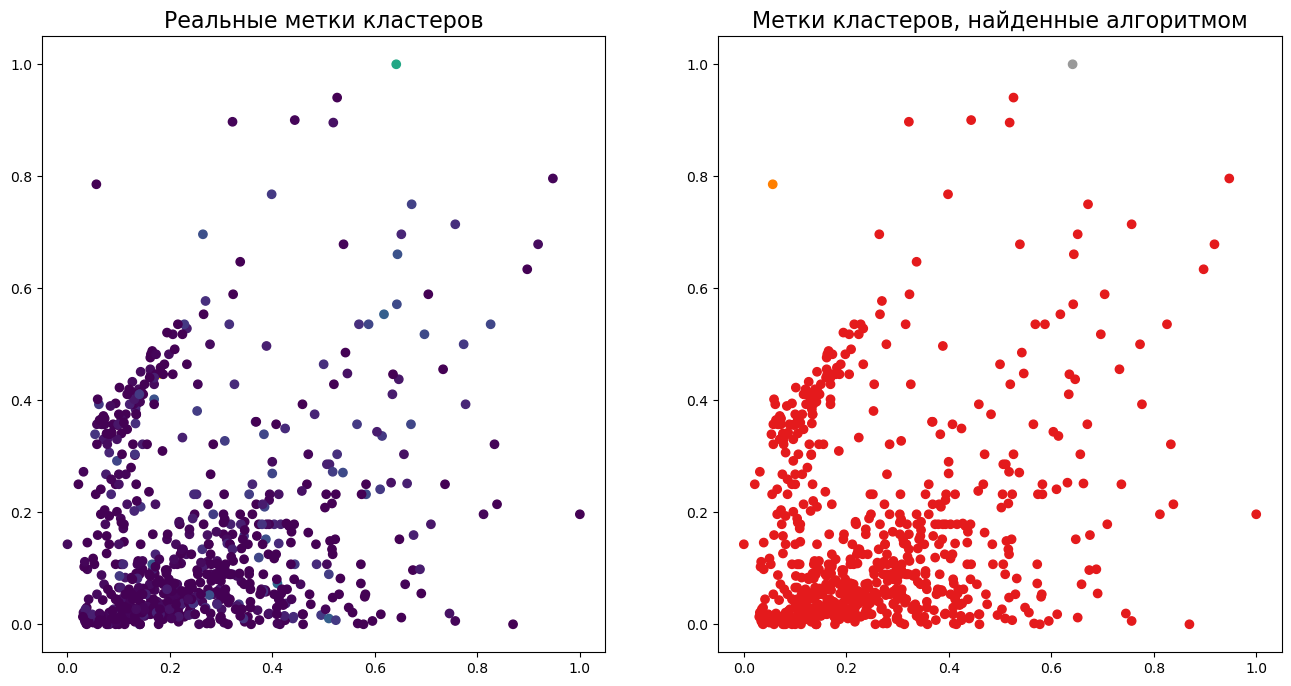

In [ ]:
df1['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df1['target'] = df1_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

## **Кластерный анализ с применением k-means алгоритма**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
WCSS = []
Silh = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    df1['cluster_labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df1['cluster_labels'], metric='euclidean'))

C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\s

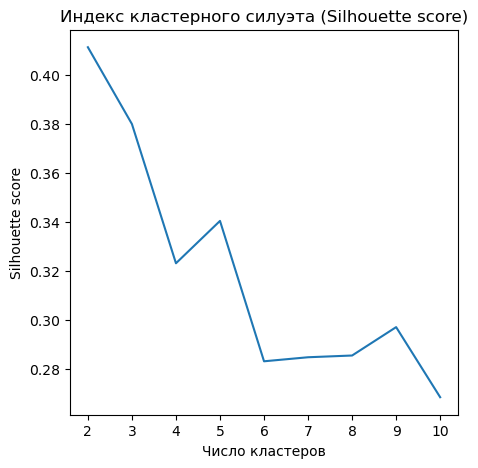

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
Silh

[0.41147775324210906,
 0.38010186506092186,
 0.323219729267545,
 0.34052699097287226,
 0.2831795758502466,
 0.2848292848154543,
 0.28553873152303477,
 0.2971370360994064,
 0.2685009201254308]

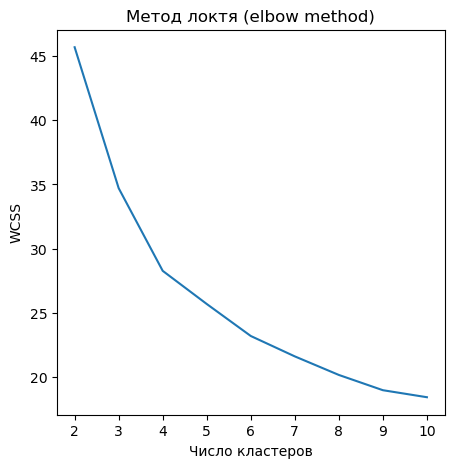

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), WCSS)
plt.title('Метод локтя (elbow method)')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

In [ ]:
WCSS

[45.67910806597281,
 34.711545018316635,
 28.281201387219017,
 25.702820587133786,
 23.212464299236075,
 21.62599870561552,
 20.182255582652367,
 18.995452909214517,
 18.449313846310158]

C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP Pavilion Gaming\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

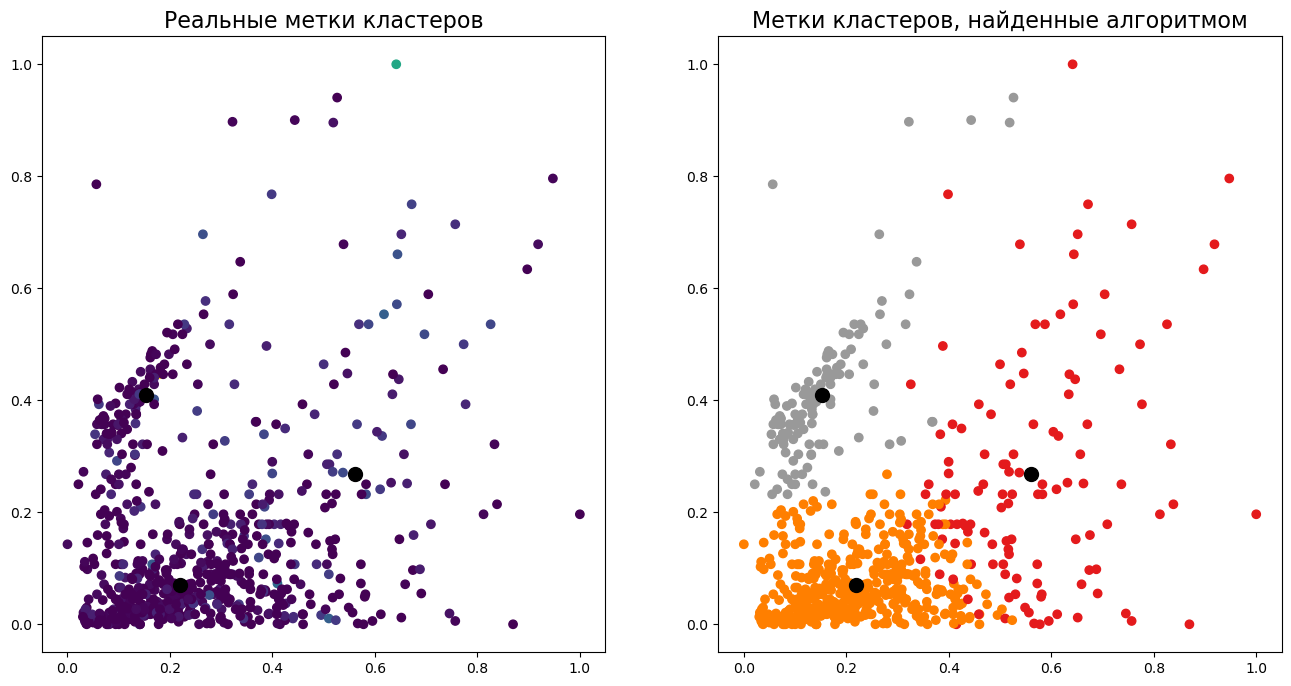

In [ ]:
df1['target'] = df1_target
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(scaled_data)
df1['cluster_labels'] = kmeans.fit_predict(scaled_data)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1], c=df1['target'])
axes[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

## **Кластерный анализ с применением fuzzy-c-means-алгоритма**

In [ ]:
from fcmeans import FCM
from sklearn.metrics import silhouette_score
Silh = []
for i in range(2,11):
    fcm = FCM(n_clusters=i, m=2, max_iter = 300, random_state=0)
    fcm.fit(scaled_data)
    df1['cluster_labels'] = fcm.predict(scaled_data)
    Silh.append(silhouette_score(scaled_data, df1['cluster_labels'],
                                 metric='euclidean'))

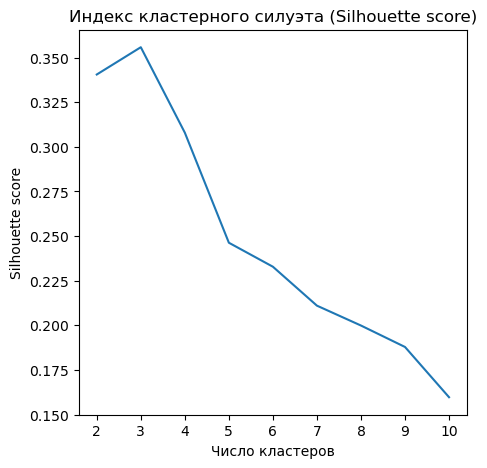

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2,11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
Silh

[0.340525256948929,
 0.3558144645230211,
 0.3079300164576039,
 0.24627941900125894,
 0.23283211870743917,
 0.21102225072921457,
 0.1998827321372582,
 0.1878729386091849,
 0.15972202499377933]

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

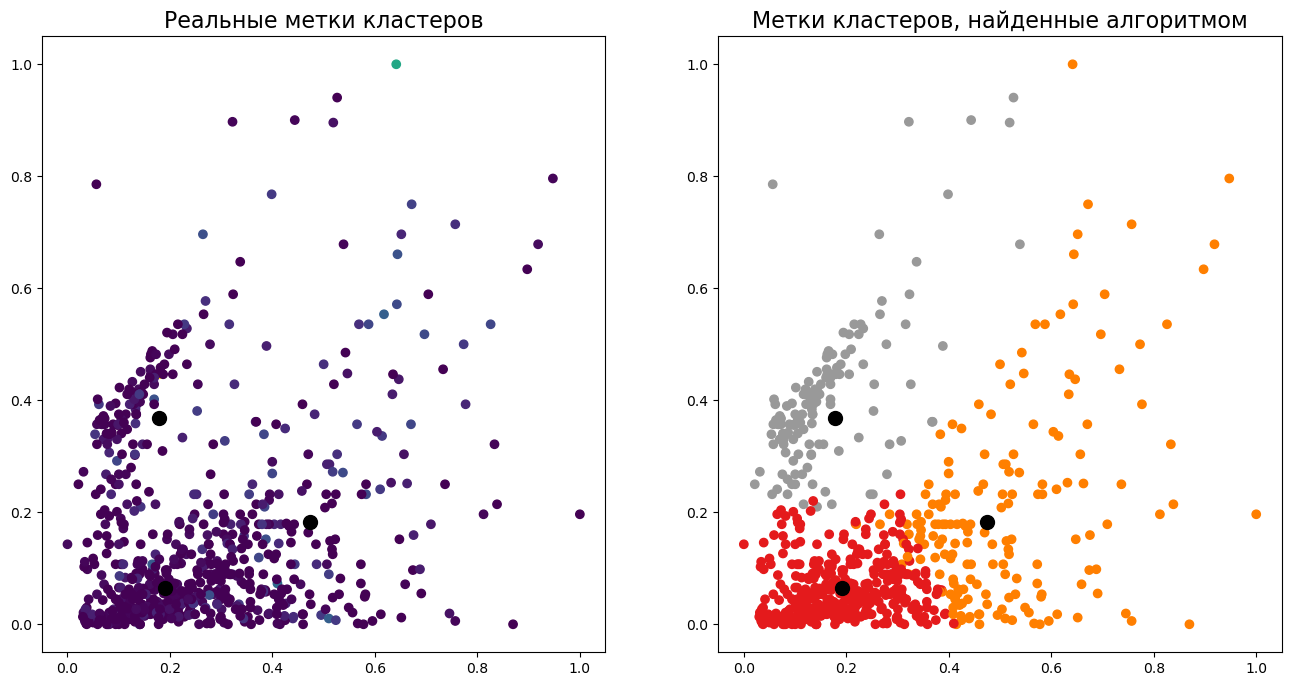

In [ ]:
df1['target'] = df1_target
fcm = FCM(n_clusters=3, m=2, max_iter = 300, random_state=0)
fcm.fit(scaled_data)
df1['cluster_labels'] = fcm.predict(scaled_data)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1], c=df1['target'])
axes[0].scatter(fcm.centers[:,0], fcm.centers[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df1['cluster_labels'], cmap=plt.cm.Set1)
axes[1].scatter(fcm.centers[:,0], fcm.centers[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

## Пример кластерного анализа с применением DBSCAN-алгоритма

In [ ]:
from math import sqrt
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
    return kn_distance

Text(0.5, 0, 'Eps расстояние')

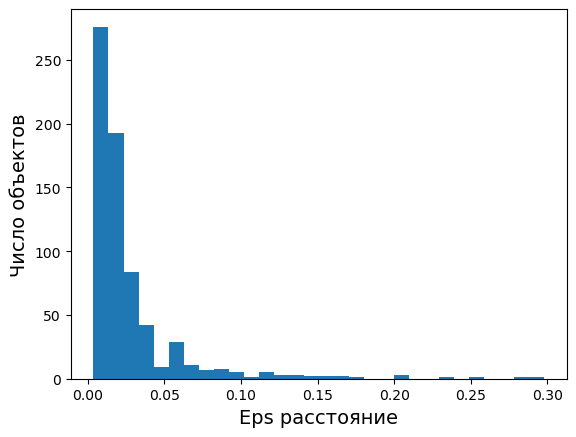

In [ ]:
eps_dist = calculate_kn_distance(scaled_data,4)
plt.hist(eps_dist,bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps расстояние', size=14)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
db = DBSCAN(eps=0.05, min_samples=4).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true=df1['target']
print("Число кластеров: %d" % n_clusters_)
print("Число шумовых объектов: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true,
                                                                 labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels))

Число кластеров: 5
Число шумовых объектов: 382
Homogeneity: 0.088
Completeness: 0.161
V-measure: 0.114
Adjusted Rand Index: -0.027
Adjusted Mutual Information: 0.081


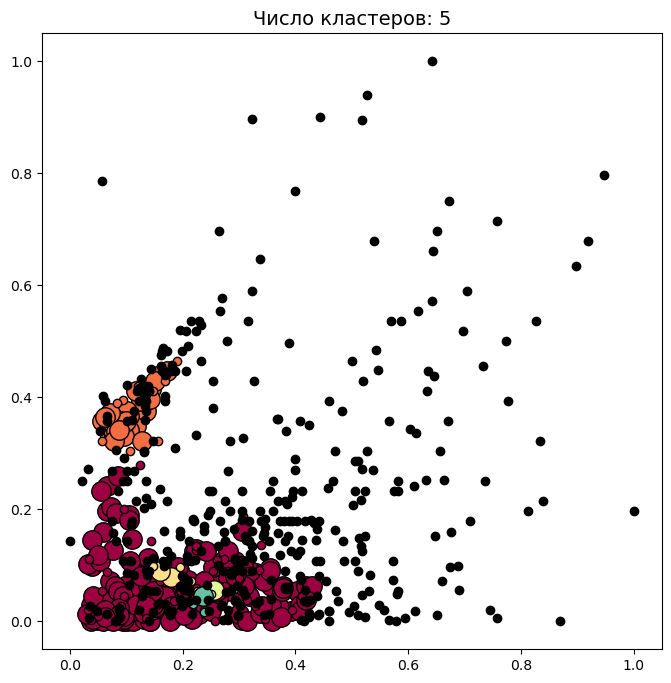

In [ ]:
plt.figure(figsize=(8,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]
    class_member_mask = labels == k
    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = scaled_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )

plt.title("Число кластеров: %d" % n_clusters_, size=14)
plt.show()

## Датасет № 2 - Кластеризация набора данных с неизвестными метками классов (кластеров) объектов (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [ ]:
df2 = pd.read_csv('CCGENERAL.csv')
df2 = df2.drop(columns=['CUST_ID', ])
df2 = df2.dropna(how='any')
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
df2_target = df2.loc[:,'TENURE']
np.unique(df2_target,return_counts=True)

(array([ 6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([ 184,  177,  183,  164,  226,  356, 7346], dtype=int64))

In [ ]:
scaler = preprocessing.MinMaxScaler().fit(df2.to_numpy())
scaled_data = scaler.transform(df2.to_numpy())
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.084084,0.895035,0.020910,0.014840,0.018704,0.021091,0.496000,0.205909,0.368820,0.091736,0.026942,0.041992,0.149319,0.035181,0.011312,0.159304,0.922398
std,0.110043,0.207697,0.044191,0.041321,0.040766,0.045006,0.401273,0.300054,0.398093,0.134528,0.056199,0.070337,0.122178,0.057368,0.031052,0.296271,0.218497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007777,0.909091,0.000884,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.008251,0.002214,0.000000,1.000000
50%,0.048146,1.000000,0.007655,0.001104,0.004213,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.017677,0.004089,0.000000,1.000000
75%,0.110549,1.000000,0.023368,0.014698,0.021518,0.024023,0.916667,0.333333,0.750000,0.166667,0.032520,0.050279,0.215359,0.038467,0.010804,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Иерархическая кластеризация с применением метода Уорда ('ward')

In [ ]:
distance_matrix = linkage(scaled_data, method='ward', metric='euclidean')
distance_matrix

array([[4.21200000e+03, 6.14700000e+03, 5.17690309e-04, 2.00000000e+00],
       [3.79800000e+03, 5.37000000e+03, 7.12852467e-04, 2.00000000e+00],
       [3.96900000e+03, 6.14500000e+03, 7.43095511e-04, 2.00000000e+00],
       ...,
       [1.72610000e+04, 1.72630000e+04, 2.37467686e+01, 4.43500000e+03],
       [1.72650000e+04, 1.72670000e+04, 3.11386231e+01, 4.20100000e+03],
       [1.72680000e+04, 1.72690000e+04, 6.64736417e+01, 8.63600000e+03]])

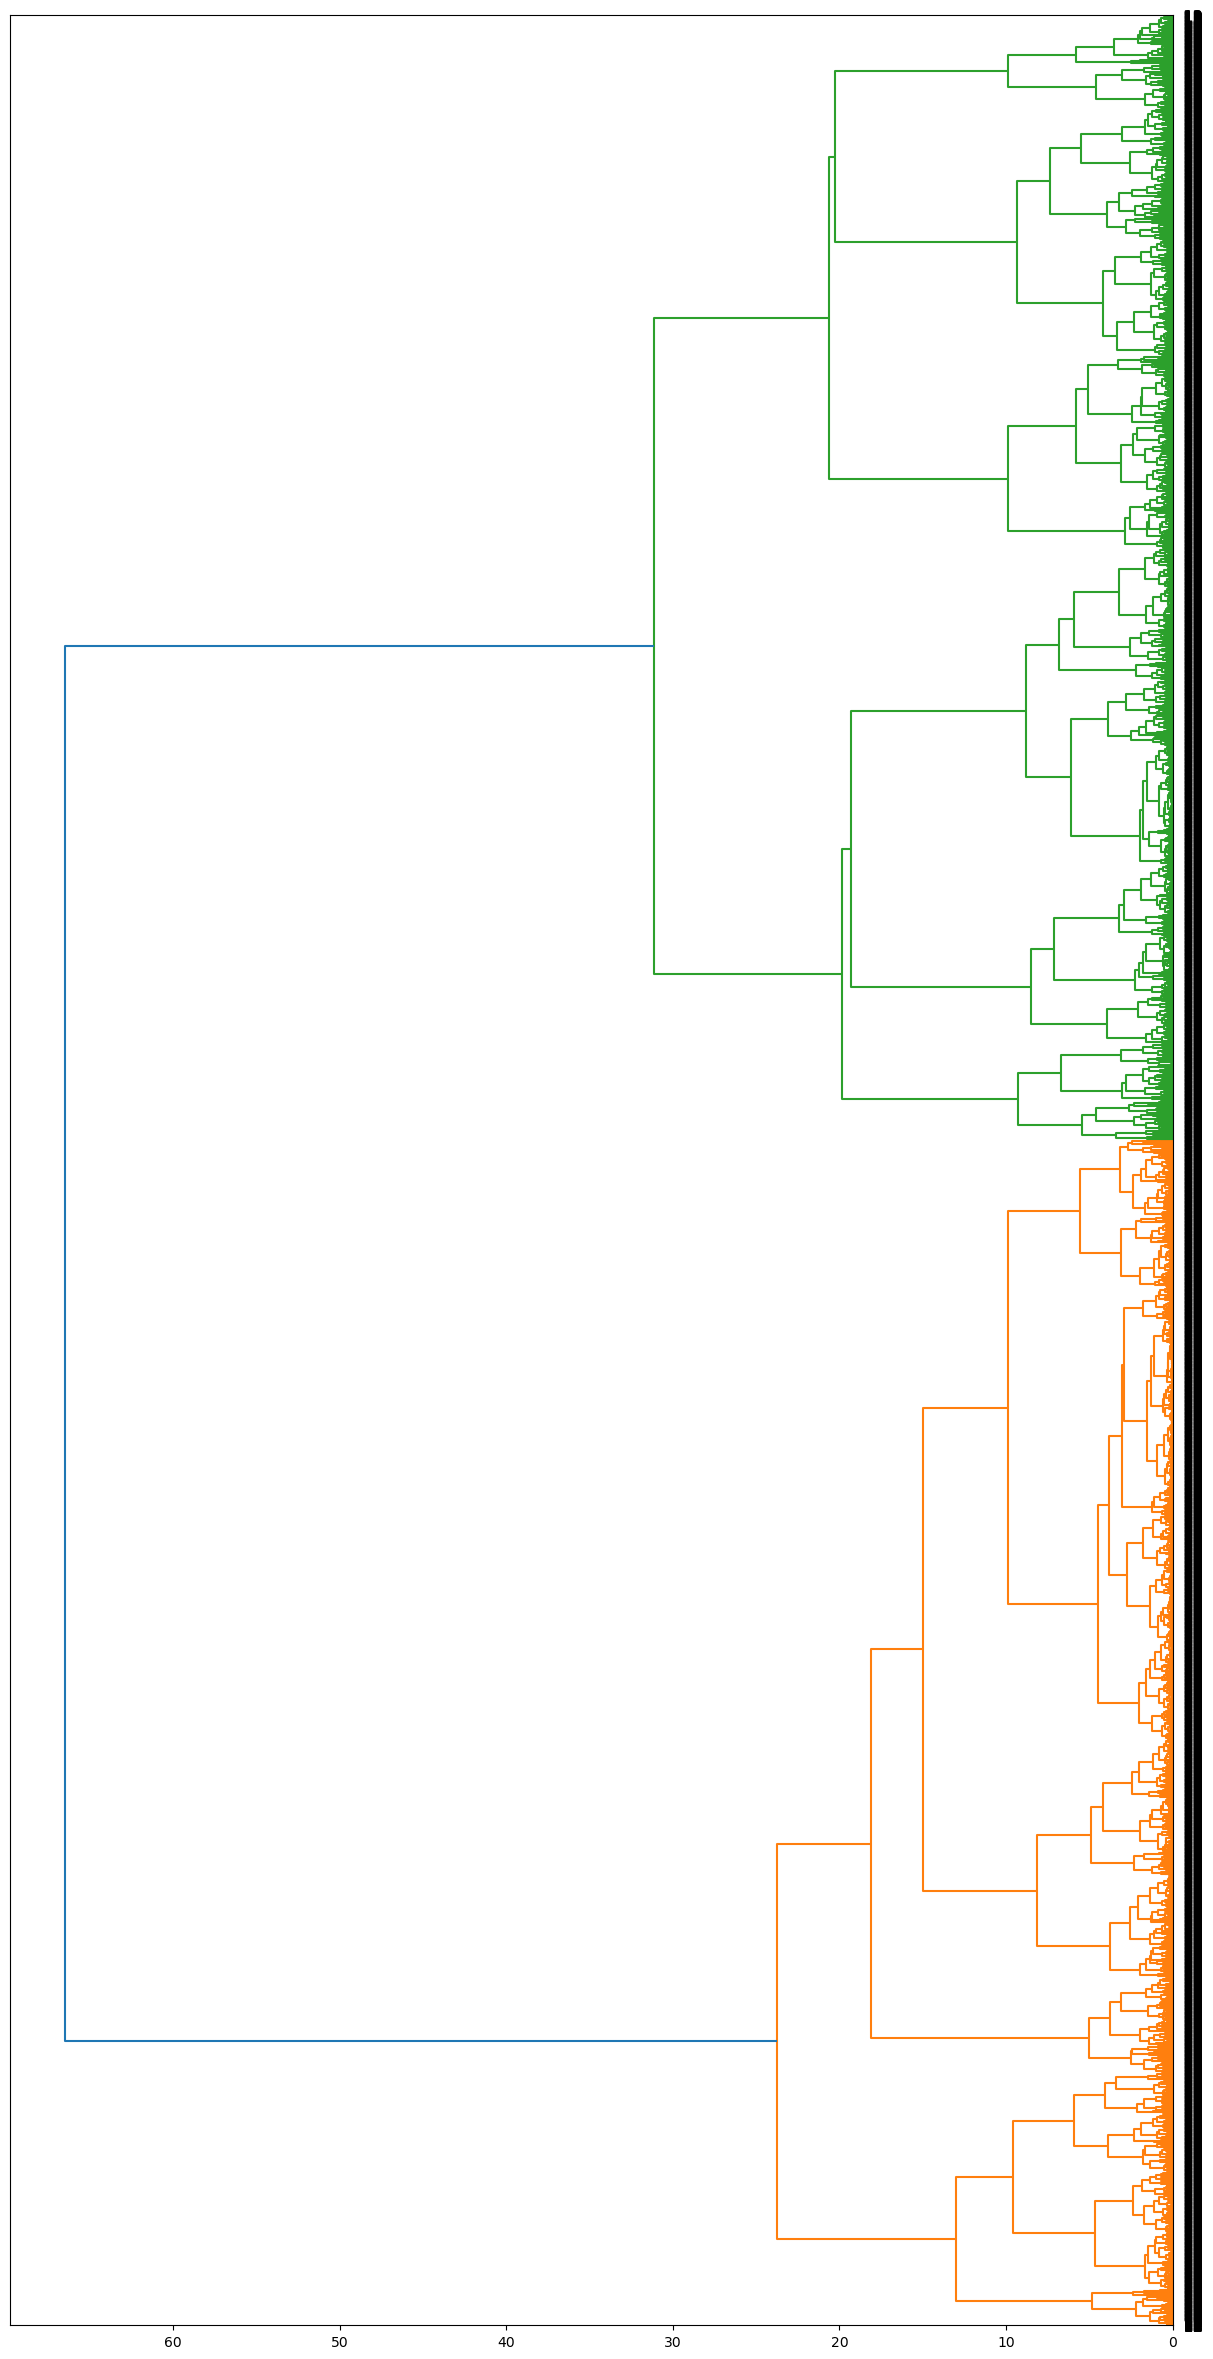

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

fig = plt.figure(figsize = (15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df2_target[i] for i in df2_target],
               orientation='left',
               leaf_font_size = 12)

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

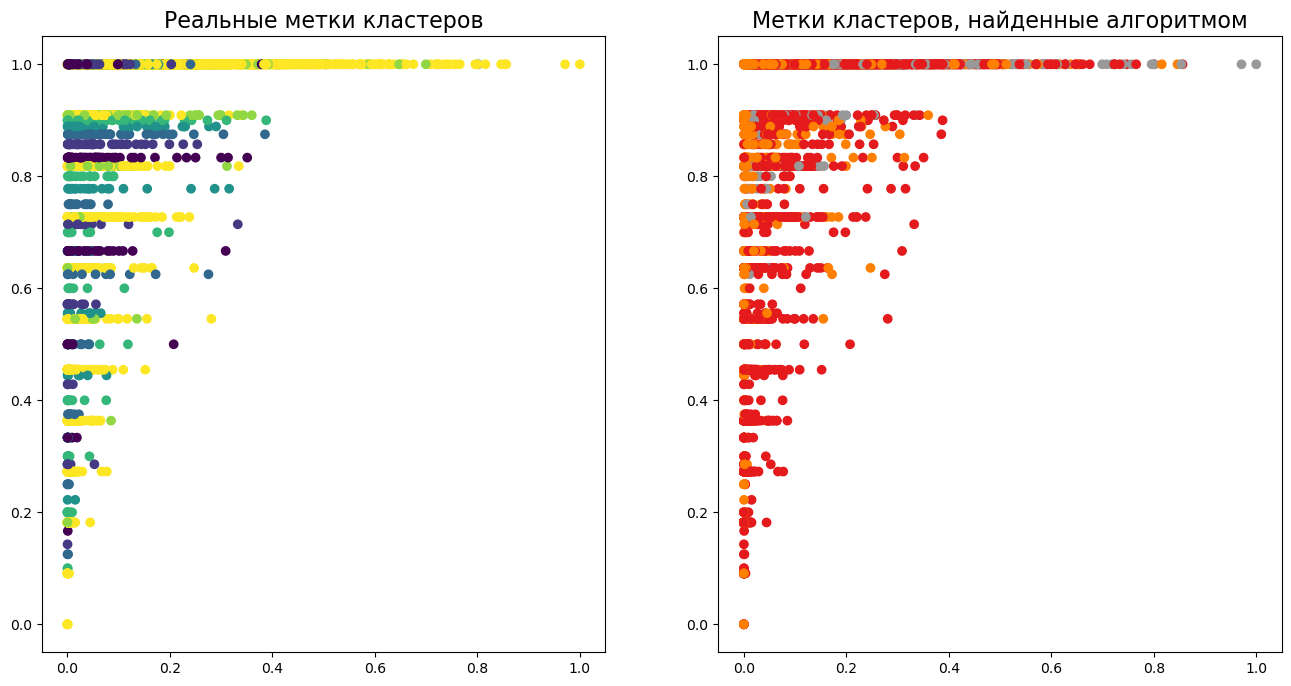

In [ ]:
df2['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df2['target'] = df2_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1], c=df2['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода одиночной связи ('single')

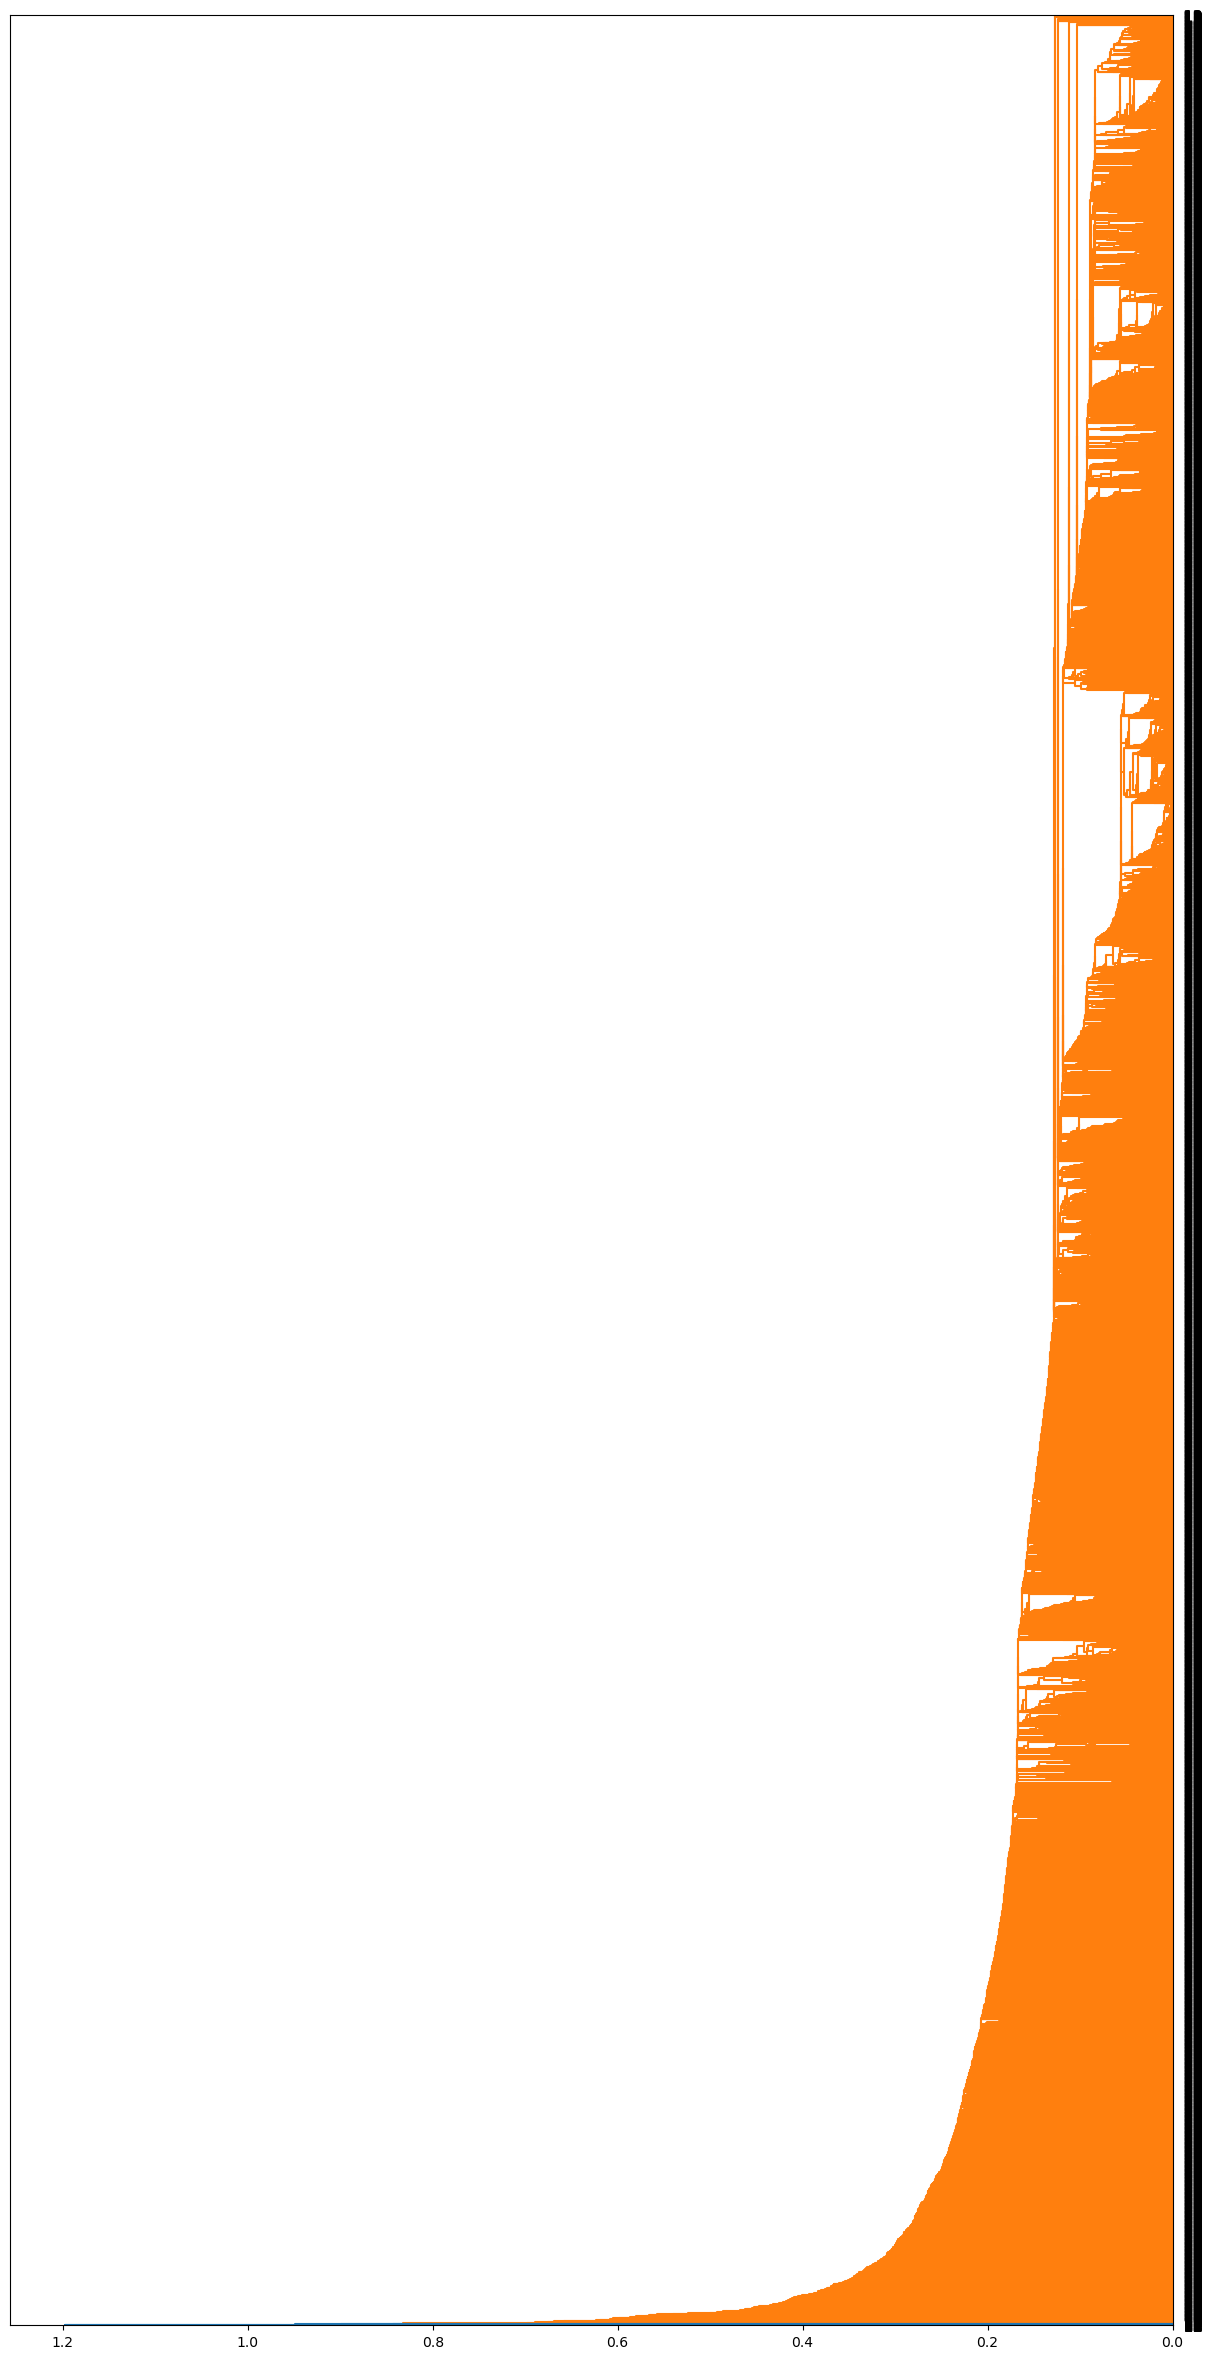

In [ ]:
df2 = df2.loc[:, df2.columns != 'target']
df2 = df2.loc[:, df2.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'single', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df2_target[i] for i in df2_target],
               orientation='left',
               leaf_font_size = 12)
plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

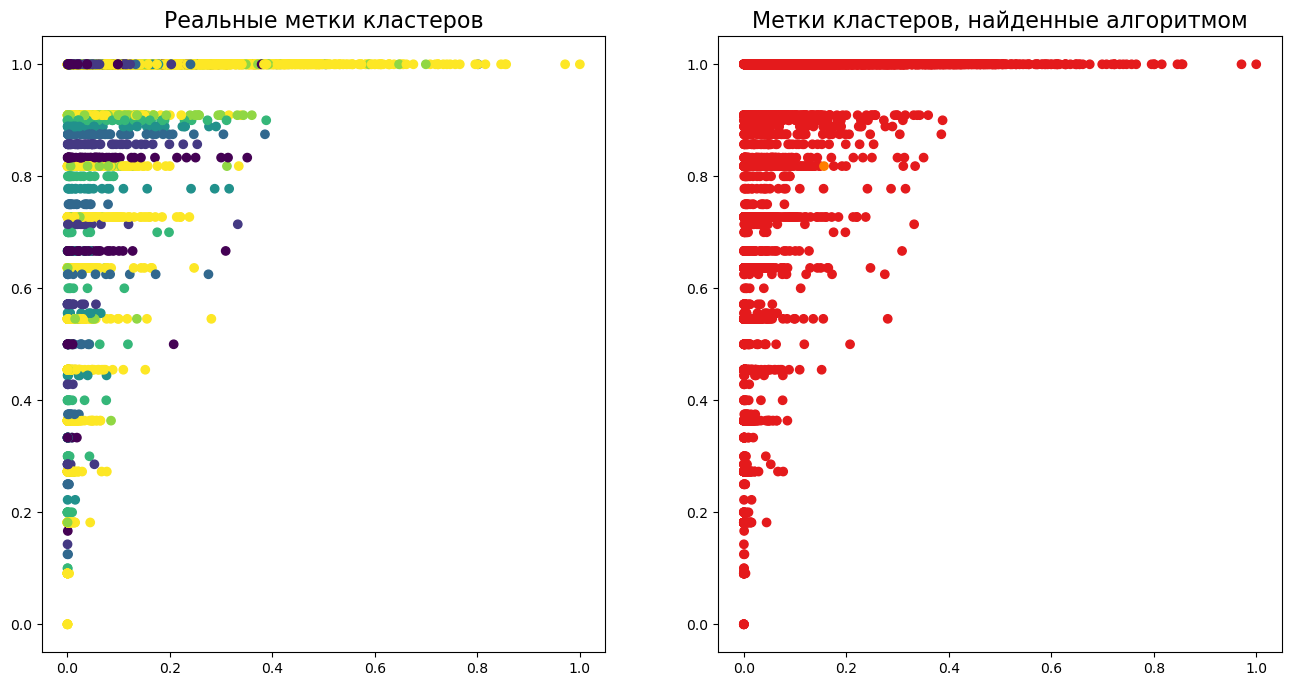

In [ ]:
df2['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df2['target'] = df2_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1], c=df2['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода полной связи ('complete')

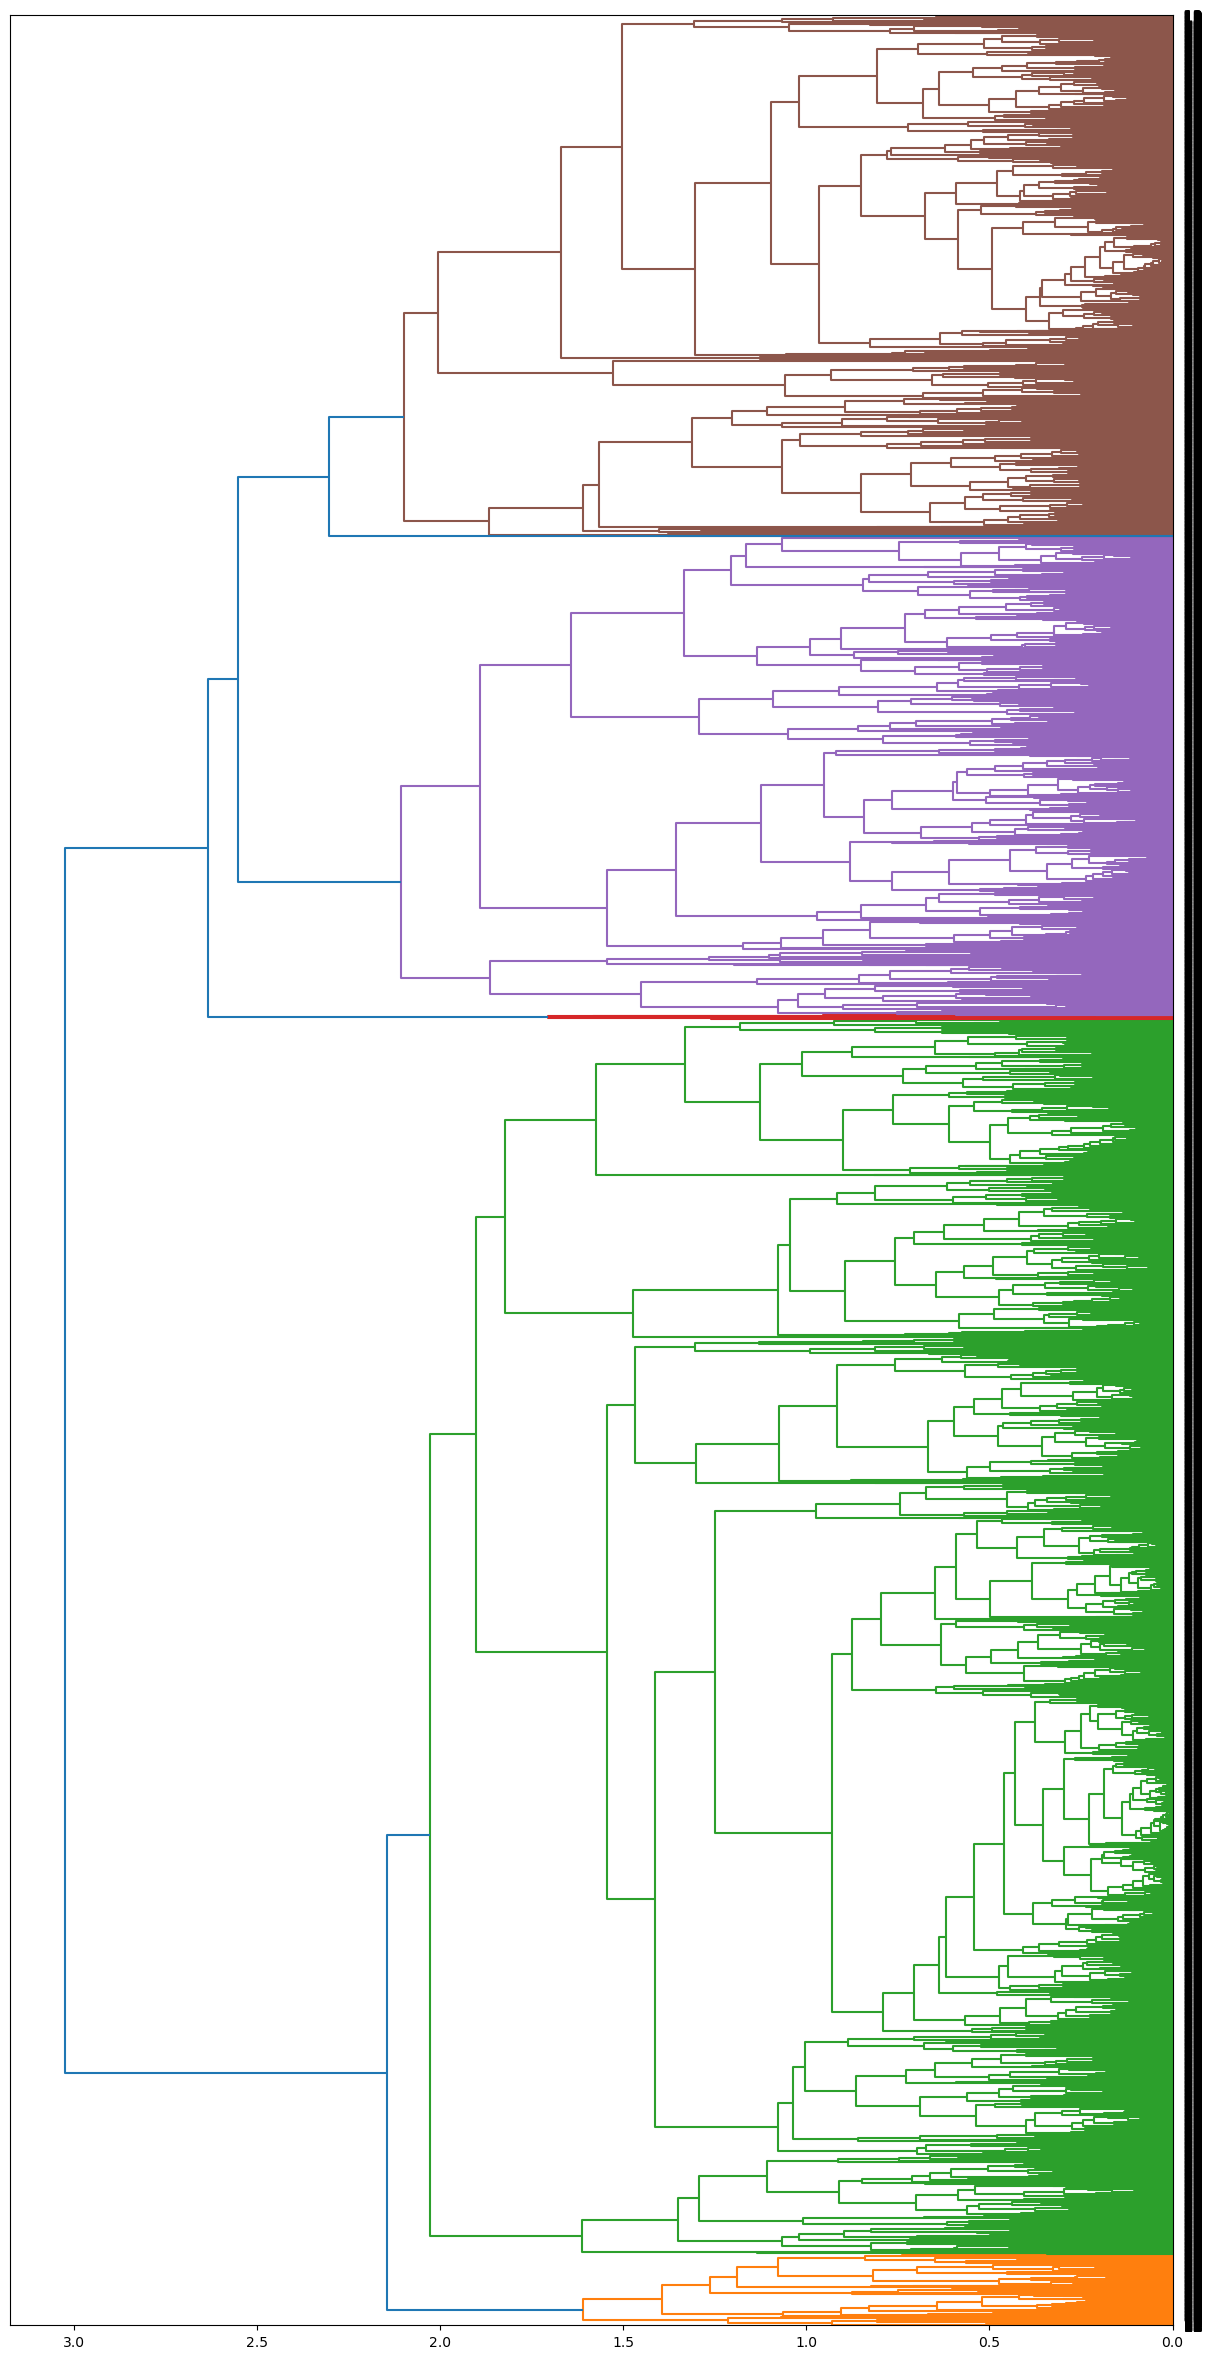

In [ ]:
df2 = df2.loc[:, df2.columns != 'target']
df2 = df2.loc[:, df2.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'complete', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df2_target[i] for i in df2_target],
               orientation='left',
               leaf_font_size = 12)
plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

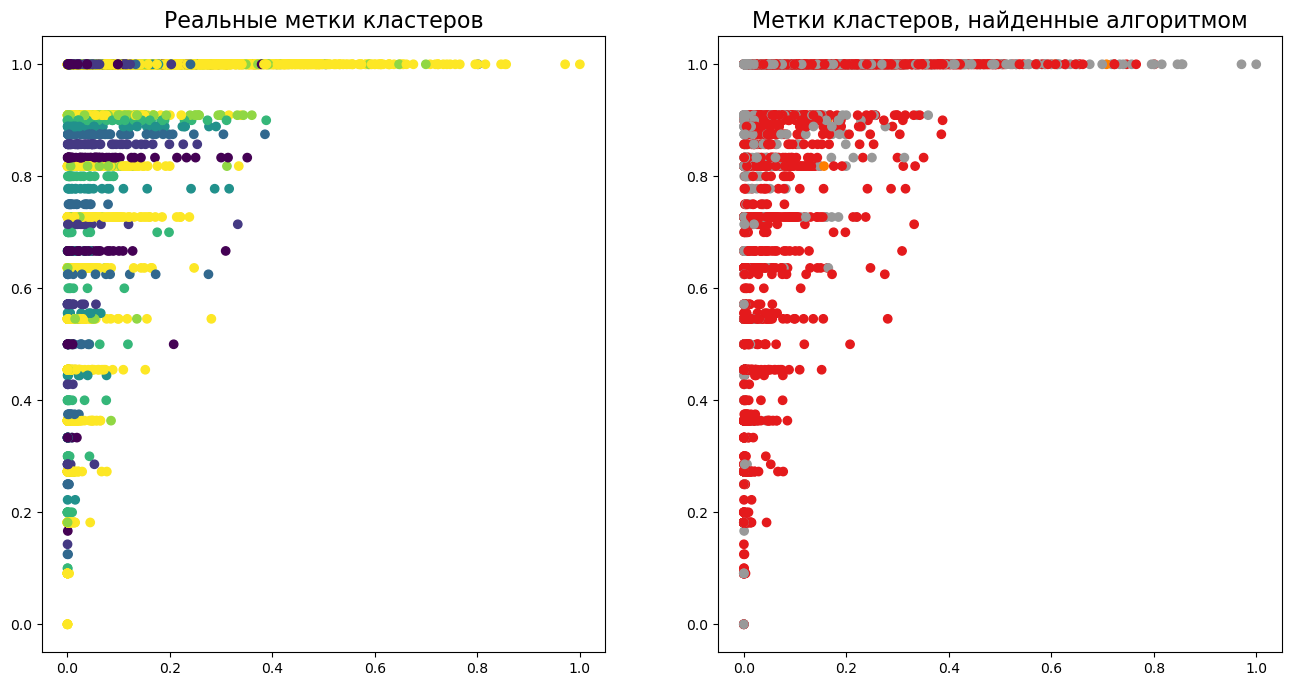

In [ ]:
df2['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df2['target'] = df2_target
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1], c=df2['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

### Иерархическая кластеризация с применением метода средней связи ('average')

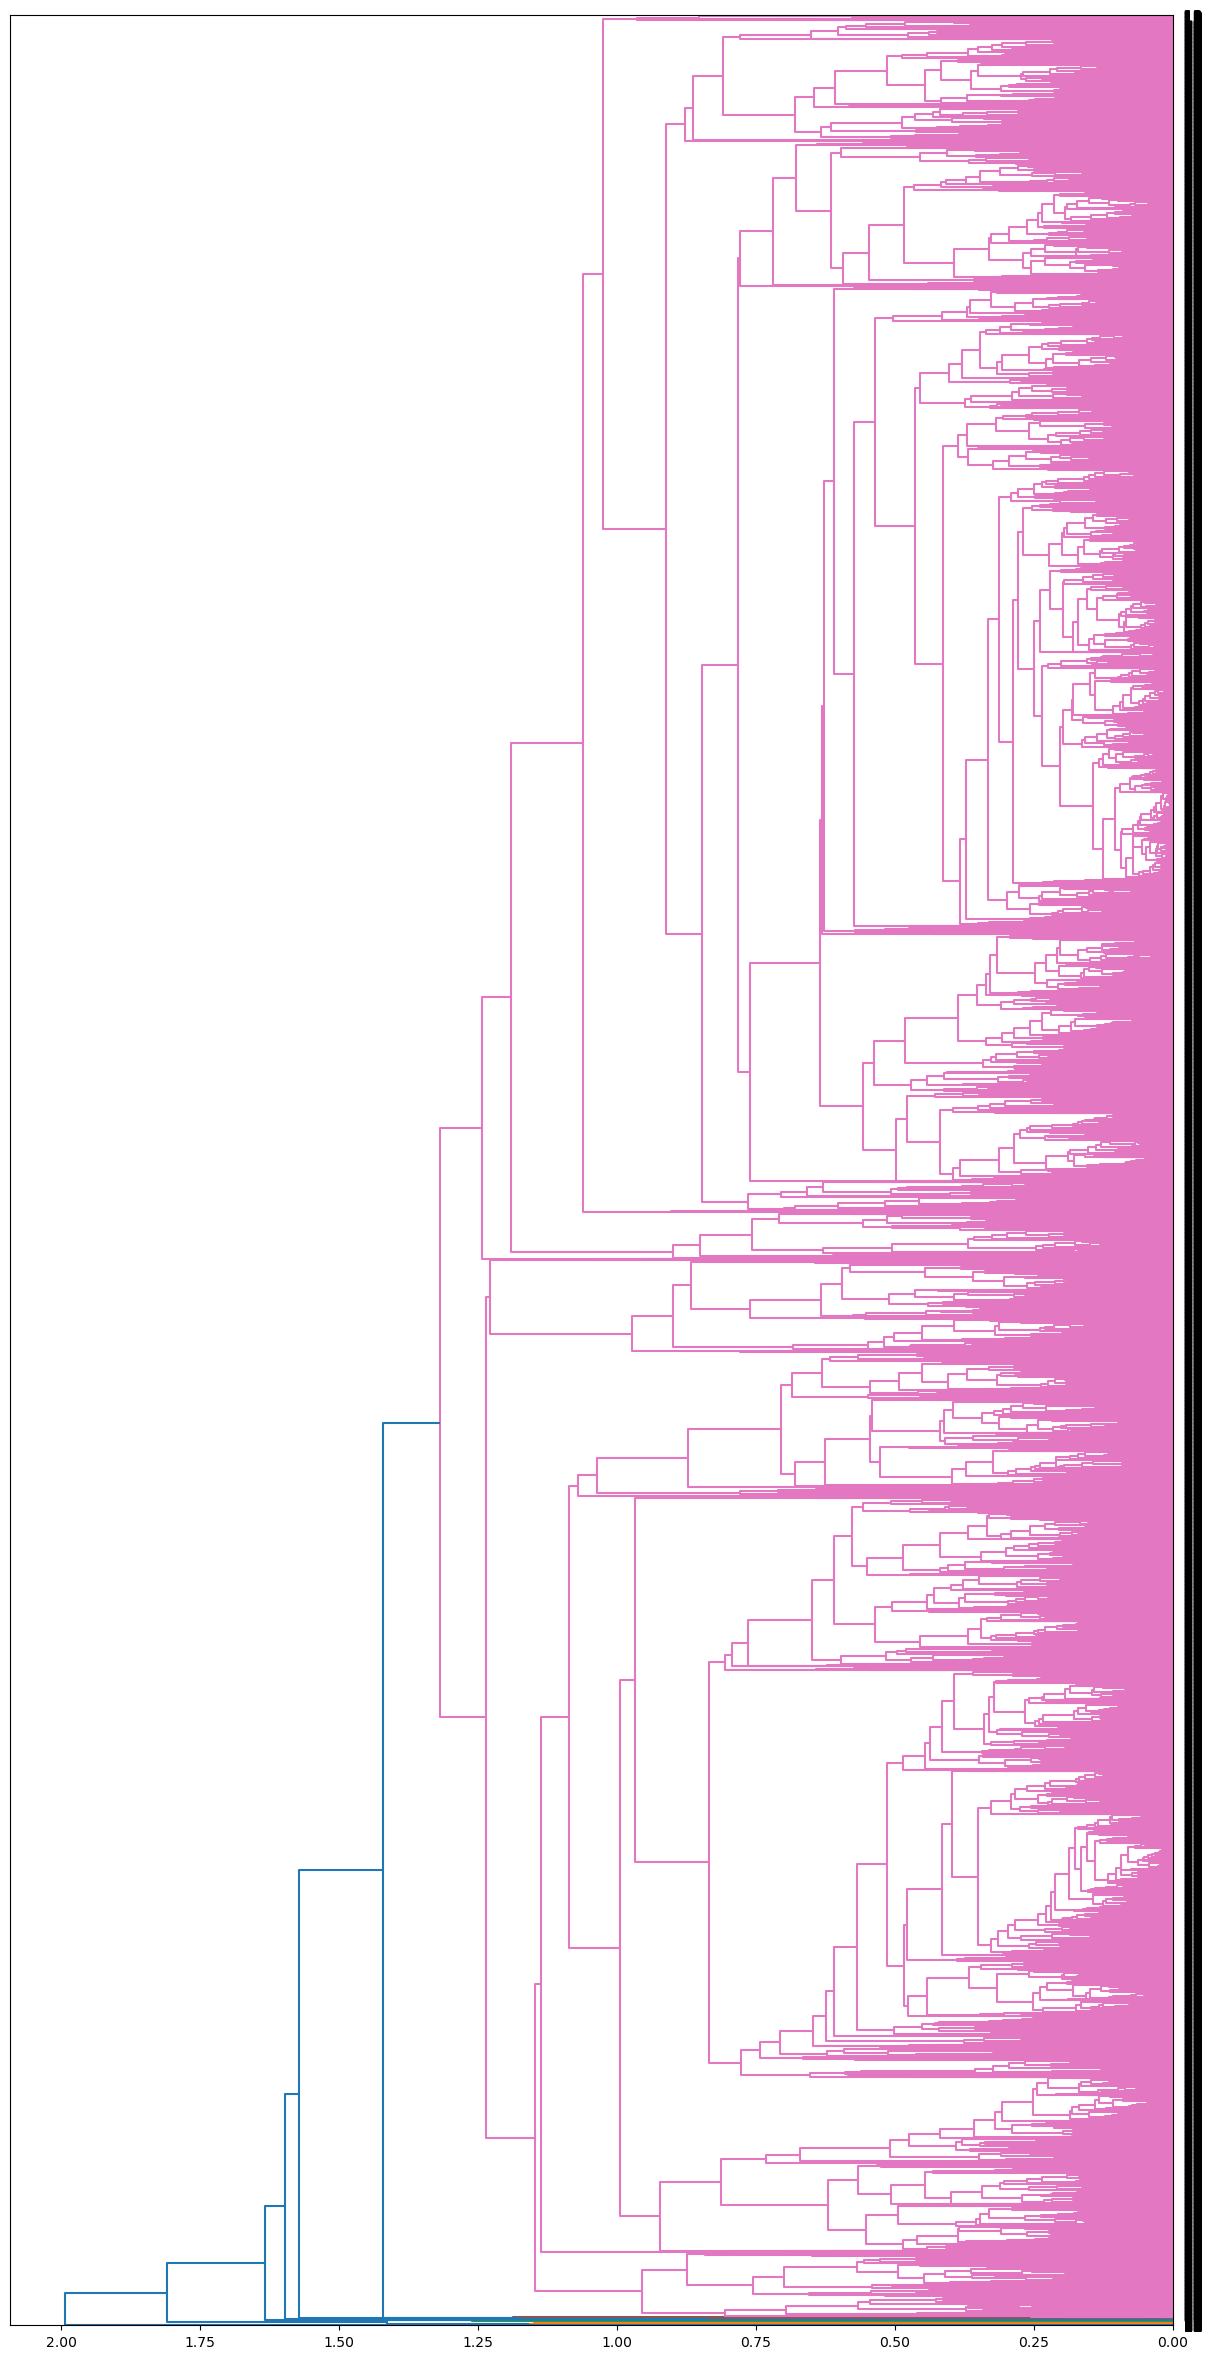

In [ ]:
df2 = df2.loc[:, df2.columns != 'target']
df2 = df2.loc[:, df2.columns != 'cluster_labels']
distance_matrix = linkage(scaled_data, method = 'average', metric = 'euclidean')
fig = plt.figure(figsize=(15,30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix,
               labels=[df2_target[i] for i in df2_target],
               orientation='left',
               leaf_font_size = 12)
plt.show()

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

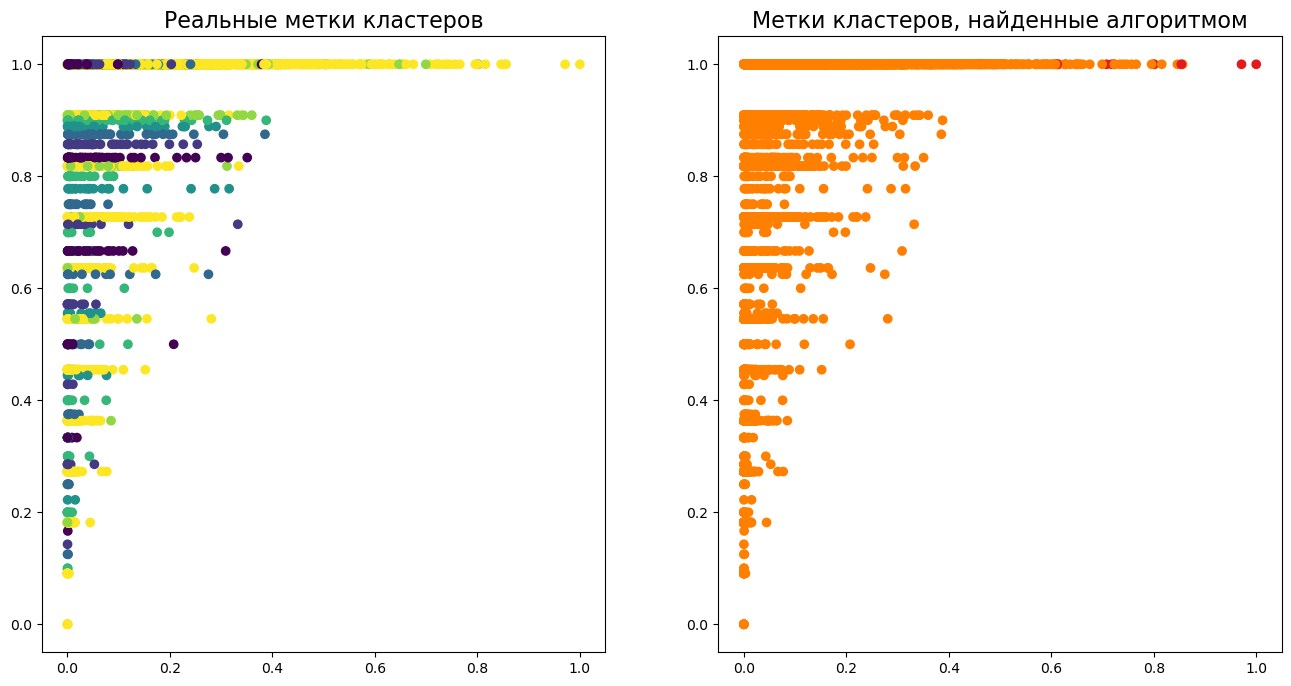

In [ ]:
df2['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df2['target'] = df2_target

fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

## **Кластерный анализ с применением k-means алгоритма**

In [ ]:
WCSS = []
Silh = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    df2['cluster_labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df2['cluster_labels'],
                                 metric='euclidean'))

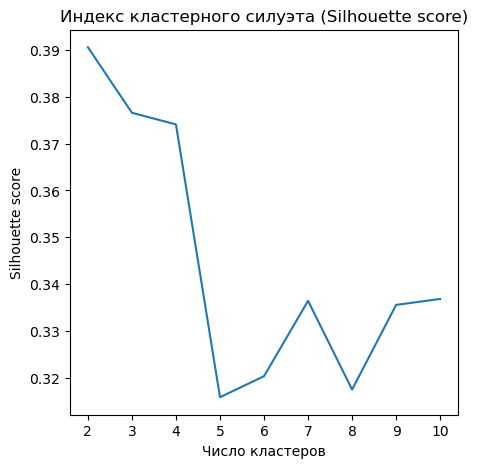

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
Silh

[0.3906086472081389,
 0.3765999463339415,
 0.37411033780001063,
 0.3158074733300819,
 0.320302307518197,
 0.33641178755500306,
 0.31744737014440366,
 0.33553564984679995,
 0.33681129317459974]

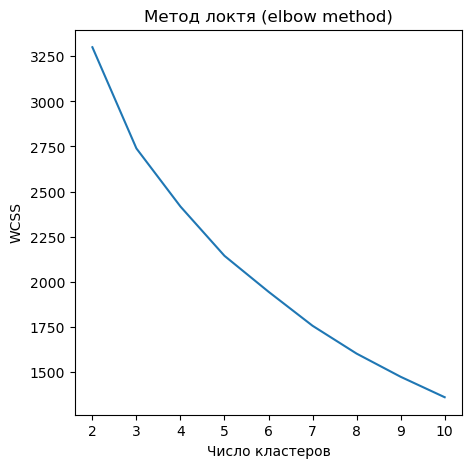

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), WCSS)
plt.title('Метод локтя (elbow method)')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

In [ ]:
WCSS

[3300.7155742208424,
 2739.005483194417,
 2416.7343931214255,
 2143.146228165555,
 1943.9892197660854,
 1755.110039429421,
 1600.7113062205167,
 1472.0955938557327,
 1358.6645308848879]

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

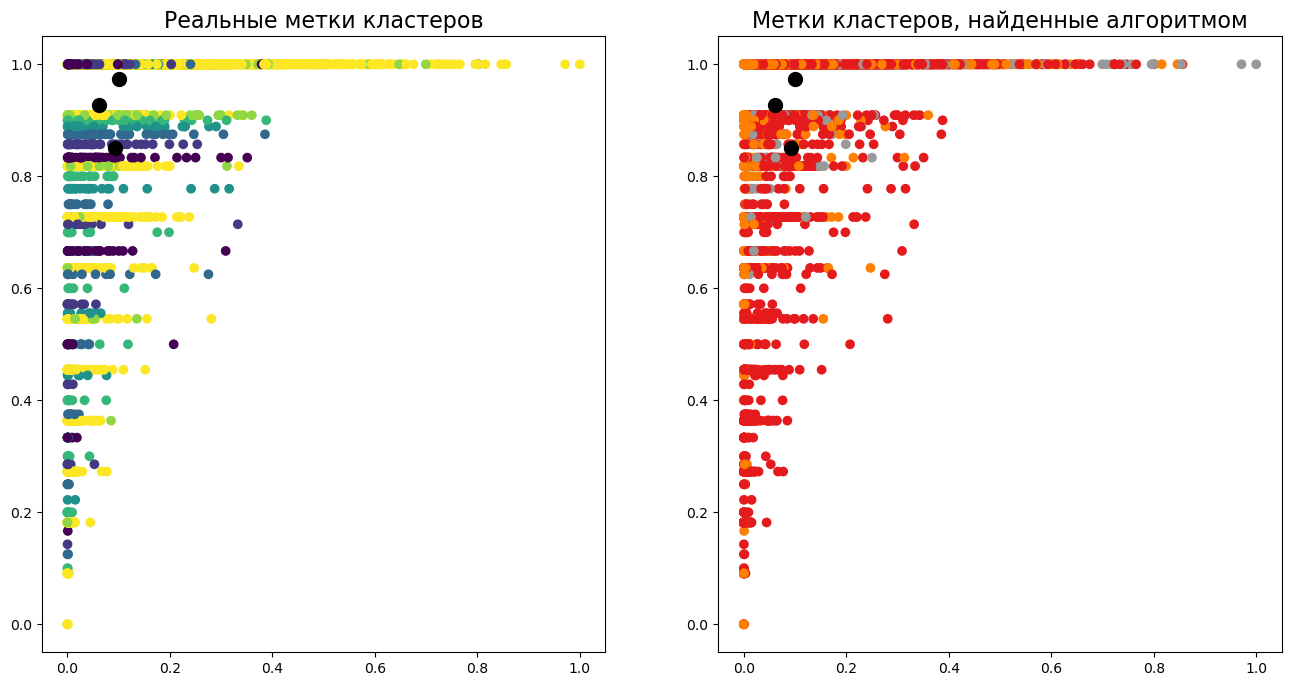

In [ ]:
df2['target'] = df2_target
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(scaled_data)
df2['cluster_labels'] = kmeans.fit_predict(scaled_data)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['target'])
axes[0].scatter(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[0].set_title('Реальные метки кластеров', fontsize=16)

axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[1].scatter(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[1].set_title('Метки кластеров, найденные алгоритмом',
                  fontsize=16)

## **Кластерный анализ с применением fuzzy-c-means-алгоритма**

In [ ]:
Silh = []
for i in range(2,11):
    fcm = FCM(n_clusters=i, m=2, max_iter = 300, random_state=0)
    fcm.fit(scaled_data)
    df2['cluster_labels'] = fcm.predict(scaled_data)
    Silh.append(silhouette_score(scaled_data, df2['cluster_labels'],
                                 metric='euclidean'))

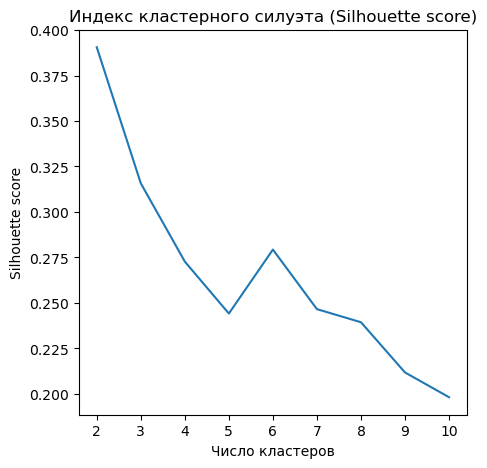

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2,11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
Silh

[0.39055403808940453,
 0.31574338219055753,
 0.2727169458994654,
 0.24418038691635555,
 0.2793255496856806,
 0.24658531166372685,
 0.23939227472811522,
 0.21178295903193775,
 0.19817458440686891]

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

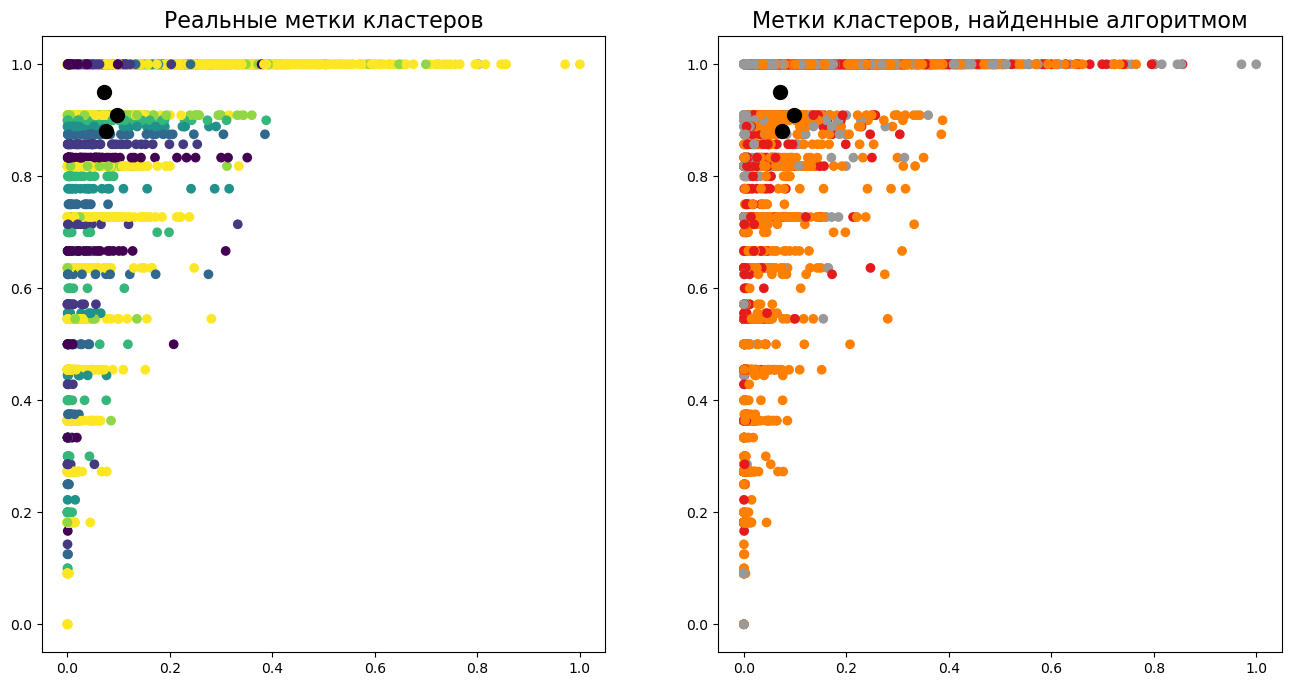

In [ ]:
df2['target'] = df2_target
fcm = FCM(n_clusters=3, m=2, max_iter = 300, random_state=0)
fcm.fit(scaled_data)
df2['cluster_labels'] = fcm.predict(scaled_data)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['target'])
axes[0].scatter(fcm.centers[:,0],
                fcm.centers[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[0].set_title('Реальные метки кластеров', fontsize=16)

axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df2['cluster_labels'], cmap=plt.cm.Set1)
axes[1].scatter(fcm.centers[:,0],
                fcm.centers[:,1],
                s = 100, c = 'black', label = 'Centroids')
axes[1].set_title('Метки кластеров, найденные алгоритмом',
                  fontsize=16)

## Пример кластерного анализа с применением DBSCAN-алгоритма

In [ ]:
from math import sqrt
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
    return kn_distance

Text(0.5, 0, 'Eps расстояние')

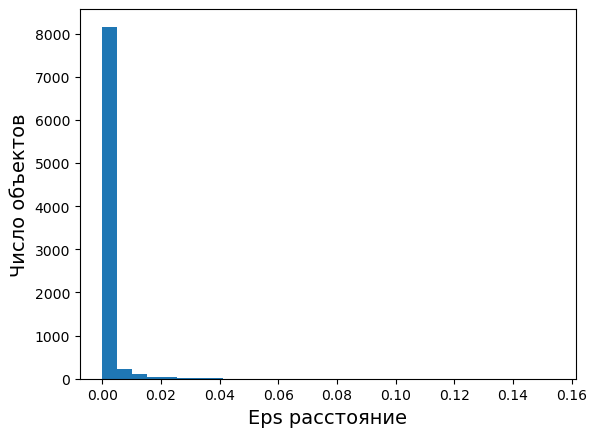

In [ ]:
eps_dist = calculate_kn_distance(scaled_data,4)
plt.hist(eps_dist,bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps расстояние', size=14)

In [ ]:
db = DBSCAN(eps=0.05, min_samples=4).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true=df2['target']
print("Число кластеров: %d" % n_clusters_)
print("Число шумовых объектов: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true,
                                                                 labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels))

Число кластеров: 113
Число шумовых объектов: 6732
Homogeneity: 0.096
Completeness: 0.047
V-measure: 0.063
Adjusted Rand Index: -0.139
Adjusted Mutual Information: 0.038


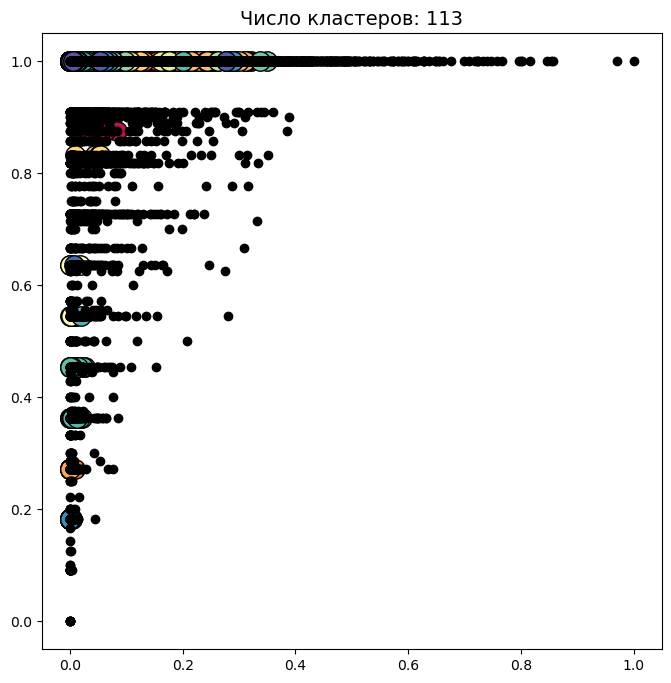

In [ ]:
plt.figure(figsize=(8,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]
    class_member_mask = labels == k
    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = scaled_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )

plt.title("Число кластеров: %d" % n_clusters_, size=14)
plt.show()